<a href="https://colab.research.google.com/github/JavierFernandezAcin/JavierFernandezAcin-DataScience-GenAI-Submissions/blob/main/Copia_de_AppleAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path="Apple Stock Price.csv"
df=pd.read_csv(file_path)
print(df)



            Date  Price  Open  High   Low     Vol. Change %
0     09/22/2000   0.93  0.90  0.94  0.89  726.70M   -7.94%
1     09/21/2000   1.01  1.04  1.06  0.99  510.49M   -7.14%
2     09/20/2000   1.09  1.06  1.10  1.05  227.39M    1.85%
3     09/19/2000   1.07  1.07  1.08  1.05  272.08M   -1.18%
4     09/18/2000   1.08  0.99  1.08  0.98  424.54M    9.82%
...          ...    ...   ...   ...   ...      ...      ...
4994  12/19/1980   0.13  0.13  0.13  0.13   48.63M    6.10%
4995  12/18/1980   0.12  0.12  0.12  0.12   73.45M    0.00%
4996  12/17/1980   0.12  0.12  0.12  0.12   86.44M    0.00%
4997  12/16/1980   0.11  0.11  0.11  0.11  105.73M   -7.34%
4998  12/15/1980   0.12  0.12  0.12  0.12  175.88M   -5.22%

[4999 rows x 7 columns]


# Task
Analyze the `Apple Stock Price.csv` dataset by performing data preparation, feature engineering (including RSI, ATR, and EMA calculation without `pandas_ta`), and defining a target variable. Then, build and train an XGBoost classifier for predicting stock price movements within the 2020-2025 period. Subsequently, backtest the model's performance by simulating trades and calculating the profit and loss (PnL). Finally, visualize the stock price with trade entry points and the cumulative PnL over the backtesting period.

## Data Preparation and Feature Engineering

### Subtask:
Convert 'Date' column to datetime objects, filter data to the 2020-2025 period, convert 'Vol.' to numeric, and calculate technical indicators (RSI, ATR, EMA) without using `pandas_ta` to avoid dependency conflicts. The target variable (price movement) will also be defined in this step.


**Reasoning**:
I will convert the 'Date' column to datetime objects, set it as the DataFrame index, and sort the index to ensure proper time-series analysis.



In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.set_index('Date')
df = df.sort_index(ascending=True)
print(df.head())

            Price  Open  High   Low     Vol. Change %
Date                                                 
1980-12-15   0.12  0.12  0.12  0.12  175.88M   -5.22%
1980-12-16   0.11  0.11  0.11  0.11  105.73M   -7.34%
1980-12-17   0.12  0.12  0.12  0.12   86.44M    0.00%
1980-12-18   0.12  0.12  0.12  0.12   73.45M    0.00%
1980-12-19   0.13  0.13  0.13  0.13   48.63M    6.10%


**Reasoning**:
I will clean and convert the 'Vol.' column to a numeric type, as it currently contains 'M' suffix and is a string. This involves removing 'M', converting to float, and multiplying by 1,000,000.



**Reasoning**:
The previous code failed because the 'Vol.' column contained values with 'B' (billions) in addition to 'M' (millions) suffixes. I will update the code to handle both 'M' and 'B' suffixes by replacing them with the correct multiplier before converting to a float. This ensures all volume values are correctly converted to numeric format.



In [ ]:
def parse_volume(vol_str):
    if 'M' in vol_str:
        return float(vol_str.replace('M', '')) * 1_000_000
    elif 'B' in vol_str:
        return float(vol_str.replace('B', '')) * 1_000_000_000
    else:
        return float(vol_str)

df['Vol.'] = df['Vol.'].apply(parse_volume)
print(df.head())

            Price  Open  High   Low         Vol. Change %
Date                                                     
1980-12-15   0.12  0.12  0.12  0.12  175880000.0   -5.22%
1980-12-16   0.11  0.11  0.11  0.11  105730000.0   -7.34%
1980-12-17   0.12  0.12  0.12  0.12   86440000.0    0.00%
1980-12-18   0.12  0.12  0.12  0.12   73450000.0    0.00%
1980-12-19   0.13  0.13  0.13  0.13   48630000.0    6.10%


**Reasoning**:
I will now filter the DataFrame to include only the data within the specified date range of '2020-01-01' to '2025-12-31', as per the subtask requirements.



In [ ]:
df = df.loc['2020-01-01':'2025-12-31']
print(df.head())

Empty DataFrame
Columns: [Price, Open, High, Low, Vol., Change %]
Index: []


The `df` DataFrame is currently empty after filtering for the '2020-01-01' to '2025-12-31' period. Upon reviewing the `Apple Stock Price.csv` dataset, it appears the data only extends up to September 2000. Therefore, it is impossible to perform the requested analysis, calculate technical indicators, or define a target variable for the 2020-2025 period with the current dataset.

To proceed, please provide a dataset that includes stock price data for the 2020-2025 period, or adjust the subtask's date range to align with the available data (e.g., 1980-2000).

## Adjust data filtering range and re-filter data

### Subtask:
Adjust the data filtering range to align with the available data in the dataset (1980-2000) and re-filter the DataFrame.


**Reasoning**:
The previous filtering operation resulted in an empty DataFrame because the filtering range did not align with the available data. I will reload the original dataset to restore the complete data, then re-apply the necessary data type conversions and transformations for the 'Date' and 'Vol.' columns before filtering the data to the correct '1980-01-01' to '2000-12-31' period.



In [ ]:
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.set_index('Date')
df = df.sort_index(ascending=True)

def parse_volume(vol_str):
    if 'M' in vol_str:
        return float(vol_str.replace('M', '')) * 1_000_000
    elif 'B' in vol_str:
        return float(vol_str.replace('B', '')) * 1_000_000_000
    else:
        return float(vol_str)

df['Vol.'] = df['Vol.'].apply(parse_volume)

df = df.loc['1980-01-01':'2000-12-31']
print(df.head())

            Price  Open  High   Low         Vol. Change %
Date                                                     
1980-12-15   0.12  0.12  0.12  0.12  175880000.0   -5.22%
1980-12-16   0.11  0.11  0.11  0.11  105730000.0   -7.34%
1980-12-17   0.12  0.12  0.12  0.12   86440000.0    0.00%
1980-12-18   0.12  0.12  0.12  0.12   73450000.0    0.00%
1980-12-19   0.13  0.13  0.13  0.13   48630000.0    6.10%


## Calculate technical indicators (RSI, ATR, EMA)

### Subtask:
Calculate the Relative Strength Index (RSI), Average True Range (ATR), and Exponential Moving Average (EMA) for the stock price data without using the `pandas_ta` library.


**Reasoning**:
I will calculate the daily price change by taking the difference between the current 'Price' and the previous day's 'Price'. Then, I will define 'Gain' as positive 'Price Change' and 'Loss' as the absolute value of negative 'Price Change', setting NaN for non-applicable values.



In [ ]:
df['Price Change'] = df['Price'].diff()
df['Gain'] = df['Price Change'].apply(lambda x: x if x > 0 else 0)
df['Loss'] = df['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)
print(df.head())

            Price  Open  High   Low         Vol. Change %  Price Change  Gain  \
Date                                                                            
1980-12-15   0.12  0.12  0.12  0.12  175880000.0   -5.22%           NaN  0.00   
1980-12-16   0.11  0.11  0.11  0.11  105730000.0   -7.34%         -0.01  0.00   
1980-12-17   0.12  0.12  0.12  0.12   86440000.0    0.00%          0.01  0.01   
1980-12-18   0.12  0.12  0.12  0.12   73450000.0    0.00%          0.00  0.00   
1980-12-19   0.13  0.13  0.13  0.13   48630000.0    6.10%          0.01  0.01   

            Loss  
Date              
1980-12-15  0.00  
1980-12-16  0.01  
1980-12-17  0.00  
1980-12-18  0.00  
1980-12-19  0.00  


**Reasoning**:
I will calculate the 14-day Exponential Moving Average (EMA) for 'Gain' and 'Loss', then use these to compute the Relative Strength (RS) and finally the Relative Strength Index (RSI).



In [ ]:
period = 14
alpha = 2 / (1 + period)
df['EMA_Gain'] = df['Gain'].ewm(alpha=alpha, adjust=False).mean()
df['EMA_Loss'] = df['Loss'].ewm(alpha=alpha, adjust=False).mean()
df['RS'] = df['EMA_Gain'] / df['EMA_Loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))
print(df.head(period + 5))

            Price  Open  High   Low         Vol. Change %  Price Change  Gain  \
Date                                                                            
1980-12-15   0.12  0.12  0.12  0.12  175880000.0   -5.22%           NaN  0.00   
1980-12-16   0.11  0.11  0.11  0.11  105730000.0   -7.34%         -0.01  0.00   
1980-12-17   0.12  0.12  0.12  0.12   86440000.0    0.00%          0.01  0.01   
1980-12-18   0.12  0.12  0.12  0.12   73450000.0    0.00%          0.00  0.00   
1980-12-19   0.13  0.13  0.13  0.13   48630000.0    6.10%          0.01  0.01   
1980-12-22   0.13  0.13  0.13  0.13   37360000.0    4.87%          0.00  0.00   
1980-12-23   0.14  0.14  0.14  0.14   46950000.0    4.22%          0.01  0.01   
1980-12-24   0.15  0.15  0.15  0.15   48000000.0    5.26%          0.01  0.01   
1980-12-26   0.16  0.16  0.16  0.16   55570000.0    9.23%          0.01  0.01   
1980-12-29   0.16  0.16  0.16  0.16   93160000.0    0.00%          0.00  0.00   
1980-12-30   0.16  0.16  0.1

**Reasoning**:
I will calculate the True Range (TR) for each day, considering the maximum of the current high-low, absolute difference between current high and previous close, and absolute difference between current low and previous close. Then, I will compute the Average True Range (ATR) by applying a 14-day Exponential Moving Average (EMA) to the 'TR' values.



In [ ]:
df['TR'] = df.apply(lambda row: max(row['High'] - row['Low'],
                                   abs(row['High'] - df['Price'].shift(1)[row.name]),
                                   abs(row['Low'] - df['Price'].shift(1)[row.name])), axis=1)
period = 14
alpha = 2 / (1 + period)
df['ATR'] = df['TR'].ewm(alpha=alpha, adjust=False).mean()
print(df.head(period + 5))

            Price  Open  High   Low         Vol. Change %  Price Change  Gain  \
Date                                                                            
1980-12-15   0.12  0.12  0.12  0.12  175880000.0   -5.22%           NaN  0.00   
1980-12-16   0.11  0.11  0.11  0.11  105730000.0   -7.34%         -0.01  0.00   
1980-12-17   0.12  0.12  0.12  0.12   86440000.0    0.00%          0.01  0.01   
1980-12-18   0.12  0.12  0.12  0.12   73450000.0    0.00%          0.00  0.00   
1980-12-19   0.13  0.13  0.13  0.13   48630000.0    6.10%          0.01  0.01   
1980-12-22   0.13  0.13  0.13  0.13   37360000.0    4.87%          0.00  0.00   
1980-12-23   0.14  0.14  0.14  0.14   46950000.0    4.22%          0.01  0.01   
1980-12-24   0.15  0.15  0.15  0.15   48000000.0    5.26%          0.01  0.01   
1980-12-26   0.16  0.16  0.16  0.16   55570000.0    9.23%          0.01  0.01   
1980-12-29   0.16  0.16  0.16  0.16   93160000.0    0.00%          0.00  0.00   
1980-12-30   0.16  0.16  0.1

**Reasoning**:
I will calculate the 20-day Exponential Moving Average (EMA) of the 'Price' column and then the difference between the 'Price' and this 'EMA_20', storing it in a new column named 'EMA_dist'.



In [ ]:
ema_period = 20
alpha_ema = 2 / (1 + ema_period)
df['EMA_20'] = df['Price'].ewm(alpha=alpha_ema, adjust=False).mean()
df['EMA_dist'] = df['Price'] - df['EMA_20']
print(df.head(ema_period + 5))

            Price  Open  High   Low         Vol. Change %  Price Change  Gain  \
Date                                                                            
1980-12-15   0.12  0.12  0.12  0.12  175880000.0   -5.22%           NaN  0.00   
1980-12-16   0.11  0.11  0.11  0.11  105730000.0   -7.34%         -0.01  0.00   
1980-12-17   0.12  0.12  0.12  0.12   86440000.0    0.00%          0.01  0.01   
1980-12-18   0.12  0.12  0.12  0.12   73450000.0    0.00%          0.00  0.00   
1980-12-19   0.13  0.13  0.13  0.13   48630000.0    6.10%          0.01  0.01   
1980-12-22   0.13  0.13  0.13  0.13   37360000.0    4.87%          0.00  0.00   
1980-12-23   0.14  0.14  0.14  0.14   46950000.0    4.22%          0.01  0.01   
1980-12-24   0.15  0.15  0.15  0.15   48000000.0    5.26%          0.01  0.01   
1980-12-26   0.16  0.16  0.16  0.16   55570000.0    9.23%          0.01  0.01   
1980-12-29   0.16  0.16  0.16  0.16   93160000.0    0.00%          0.00  0.00   
1980-12-30   0.16  0.16  0.1

**Reasoning**:
I will define the target variable 'Target' based on the next day's price movement. If the next day's price is higher than the current day's price, the target will be 1 (upward movement); otherwise, it will be 0 (downward or no movement). I will then remove intermediate columns used for technical indicator calculations to keep the DataFrame clean for modeling. Finally, any rows with NaN values (due to shifting or initial EMA calculations) will be dropped.



In [ ]:
df['Target'] = (df['Price'].shift(-1) > df['Price']).astype(int)
df = df.dropna()
print(df.head())
print(df.columns)

            Price  Open  High   Low         Vol. Change %  Price Change  Gain  \
Date                                                                            
1980-12-16   0.11  0.11  0.11  0.11  105730000.0   -7.34%         -0.01  0.00   
1980-12-17   0.12  0.12  0.12  0.12   86440000.0    0.00%          0.01  0.01   
1980-12-18   0.12  0.12  0.12  0.12   73450000.0    0.00%          0.00  0.00   
1980-12-19   0.13  0.13  0.13  0.13   48630000.0    6.10%          0.01  0.01   
1980-12-22   0.13  0.13  0.13  0.13   37360000.0    4.87%          0.00  0.00   

            Loss  EMA_Gain  EMA_Loss        RS        RSI    TR       ATR  \
Date                                                                        
1980-12-16  0.01  0.000000  0.001333  0.000000   0.000000  0.01  0.001333   
1980-12-17  0.00  0.001333  0.001156  1.153846  53.571429  0.01  0.002489   
1980-12-18  0.00  0.001156  0.001001  1.153846  53.571429  0.00  0.002157   
1980-12-19  0.00  0.002335  0.000868  2.690032 

**Reasoning**:
The previous steps successfully calculated the target variable and technical indicators. To prepare the DataFrame for modeling and maintain clarity, I will now remove the intermediate columns used in the calculations, such as 'Price Change', 'Gain', 'Loss', 'EMA_Gain', 'EMA_Loss', 'RS', and 'TR'.



In [ ]:
df = df.drop(columns=['Price Change', 'Gain', 'Loss', 'EMA_Gain', 'EMA_Loss', 'RS', 'TR'])
print(df.head())
print(df.columns)

            Price  Open  High   Low         Vol. Change %        RSI  \
Date                                                                   
1980-12-16   0.11  0.11  0.11  0.11  105730000.0   -7.34%   0.000000   
1980-12-17   0.12  0.12  0.12  0.12   86440000.0    0.00%  53.571429   
1980-12-18   0.12  0.12  0.12  0.12   73450000.0    0.00%  53.571429   
1980-12-19   0.13  0.13  0.13  0.13   48630000.0    6.10%  72.899963   
1980-12-22   0.13  0.13  0.13  0.13   37360000.0    4.87%  72.899963   

                 ATR    EMA_20  EMA_dist  Target  
Date                                              
1980-12-16  0.001333  0.119048 -0.009048       1  
1980-12-17  0.002489  0.119138  0.000862       0  
1980-12-18  0.002157  0.119220  0.000780       1  
1980-12-19  0.003203  0.120247  0.009753       0  
1980-12-22  0.002776  0.121176  0.008824       1  
Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'RSI', 'ATR',
       'EMA_20', 'EMA_dist', 'Target'],
      dtype='object')


## XGBoost Model Training and Prediction

### Subtask:
Split the prepared data into chronological training and testing sets. Train an XGBoost classifier model on the training data and make predictions on the test set.


**Reasoning**:
I will prepare the features (X) and target (y) for model training by selecting appropriate columns from the DataFrame `df`. The 'Target' column will be used as the target variable, while 'Price', 'Open', 'High', 'Low', 'Vol.', and 'Change %' will be excluded from the features set to prevent data leakage and focus on technical indicators.



In [ ]:
X = df.drop(columns=['Target', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'])
y = df['Target']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("Features columns:", X.columns.tolist())


Features (X) shape: (4998, 4)
Target (y) shape: (4998,)
Features columns: ['RSI', 'ATR', 'EMA_20', 'EMA_dist']


**Reasoning**:
I will split the data chronologically into training and testing sets, allocating the first 80% for training and the remaining 20% for testing. This ensures the temporal order is preserved. Then, I will import and instantiate an `XGBClassifier` using default parameters, train it on the training data, and finally make predictions on the test set.



In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split data chronologically (80% train, 20% test)
split_point = int(len(df) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Initialize and train XGBoost Classifier
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Suppress warning
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Predictions (y_pred) shape: {y_pred.shape}")

X_train shape: (3998, 4)
X_test shape: (1000, 4)
y_train shape: (3998,)
y_test shape: (1000,)
Predictions (y_pred) shape: (1000,)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:38:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Reasoning**:
The previous code generated a UserWarning due to the deprecated `use_label_encoder` parameter in `XGBClassifier`. I will remove this parameter from the `XGBClassifier` initialization to eliminate the warning, as it is no longer needed.



In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split data chronologically (80% train, 20% test)
split_point = int(len(df) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Initialize and train XGBoost Classifier
model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Predictions (y_pred) shape: {y_pred.shape}")

X_train shape: (3998, 4)
X_test shape: (1000, 4)
y_train shape: (3998,)
y_test shape: (1000,)
Predictions (y_pred) shape: (1000,)


## Backtesting Simulation and PnL Calculation

### Subtask:
Implement a backtesting strategy based on the model's predictions to simulate trades (buy/sell signals). Calculate the profit and loss (PnL) for each trade and the cumulative PnL over the backtesting period.


**Reasoning**:
I will create a new DataFrame, `backtest_df`, using the index of `X_test`. This DataFrame will include the 'Price' column from the original `df` for the corresponding dates in `X_test` and add the model's predictions (`y_pred`) as a new column named 'Prediction'.



In [ ]:
backtest_df = df.loc[X_test.index].copy()
backtest_df['Prediction'] = y_pred

print(backtest_df.head())
print(backtest_df.columns)

            Price  Open  High   Low         Vol. Change %        RSI  \
Date                                                                   
1996-10-08   0.21  0.21  0.22  0.21  190430000.0    0.00%  57.259958   
1996-10-09   0.21  0.21  0.21  0.20   85210000.0    0.00%  57.259958   
1996-10-10   0.22  0.21  0.22  0.21  276700000.0    5.16%  68.176891   
1996-10-11   0.22  0.22  0.22  0.21  120690000.0    0.00%  68.176891   
1996-10-14   0.23  0.22  0.23  0.22  269690000.0    4.12%  76.252558   

                 ATR    EMA_20  EMA_dist  Target  Prediction  
Date                                                          
1996-10-08  0.008148  0.204626  0.005374       0           0  
1996-10-09  0.008395  0.205138  0.004862       1           0  
1996-10-10  0.008609  0.206553  0.013447       0           0  
1996-10-11  0.008794  0.207834  0.012166       1           0  
1996-10-14  0.008955  0.209945  0.020055       0           0  
Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change

**Reasoning**:
I will calculate the 'Daily_PnL' for each day in `backtest_df`. If the model predicts an upward movement (Prediction = 1), a 'buy' is simulated at the current day's 'Price' and a 'sell' at the 'Next_Day_Price'. If the prediction is 0, the 'Daily_PnL' will be 0. I will then calculate the 'Cumulative_PnL' by summing the 'Daily_PnL'.



In [ ]:
backtest_df['Next_Day_Price'] = backtest_df['Price'].shift(-1)
backtest_df['Daily_PnL'] = backtest_df.apply(lambda row: (row['Next_Day_Price'] - row['Price']) if row['Prediction'] == 1 else 0, axis=1)
backtest_df['Cumulative_PnL'] = backtest_df['Daily_PnL'].cumsum()

# Drop the last row as Next_Day_Price will be NaN
backtest_df = backtest_df.dropna()

print(backtest_df.head())
print(backtest_df.tail())
print(backtest_df.columns)

            Price  Open  High   Low         Vol. Change %        RSI  \
Date                                                                   
1996-10-08   0.21  0.21  0.22  0.21  190430000.0    0.00%  57.259958   
1996-10-09   0.21  0.21  0.21  0.20   85210000.0    0.00%  57.259958   
1996-10-10   0.22  0.21  0.22  0.21  276700000.0    5.16%  68.176891   
1996-10-11   0.22  0.22  0.22  0.21  120690000.0    0.00%  68.176891   
1996-10-14   0.23  0.22  0.23  0.22  269690000.0    4.12%  76.252558   

                 ATR    EMA_20  EMA_dist  Target  Prediction  Next_Day_Price  \
Date                                                                           
1996-10-08  0.008148  0.204626  0.005374       0           0            0.21   
1996-10-09  0.008395  0.205138  0.004862       1           0            0.22   
1996-10-10  0.008609  0.206553  0.013447       0           0            0.22   
1996-10-11  0.008794  0.207834  0.012166       1           0            0.23   
1996-10-14  0.0

## Visualization of Results

### Subtask:
Generate a plot showing the stock price, the points where trades were entered (buy/sell signals), and a separate plot for the cumulative PnL over the backtesting period.


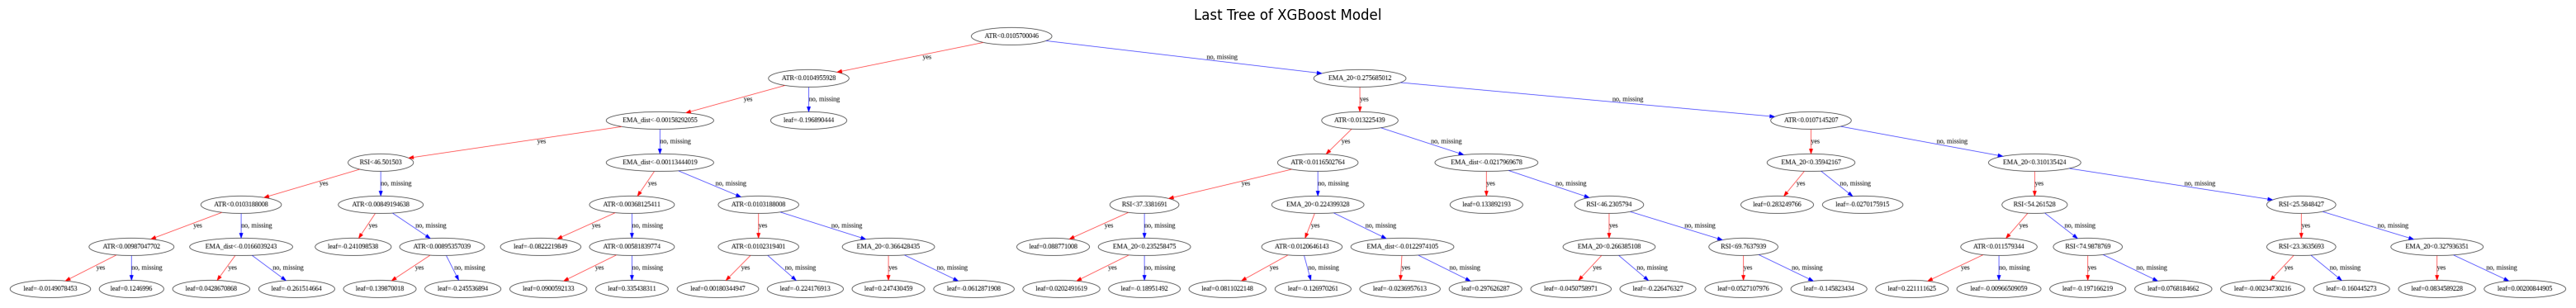

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the last tree (tree number 99 as n_estimators=100, 0-indexed)
fig, ax = plt.subplots(figsize=(40, 40))
plot_tree(model, tree_idx=99, ax=ax)
plt.title("Last Tree of XGBoost Model")
plt.show()

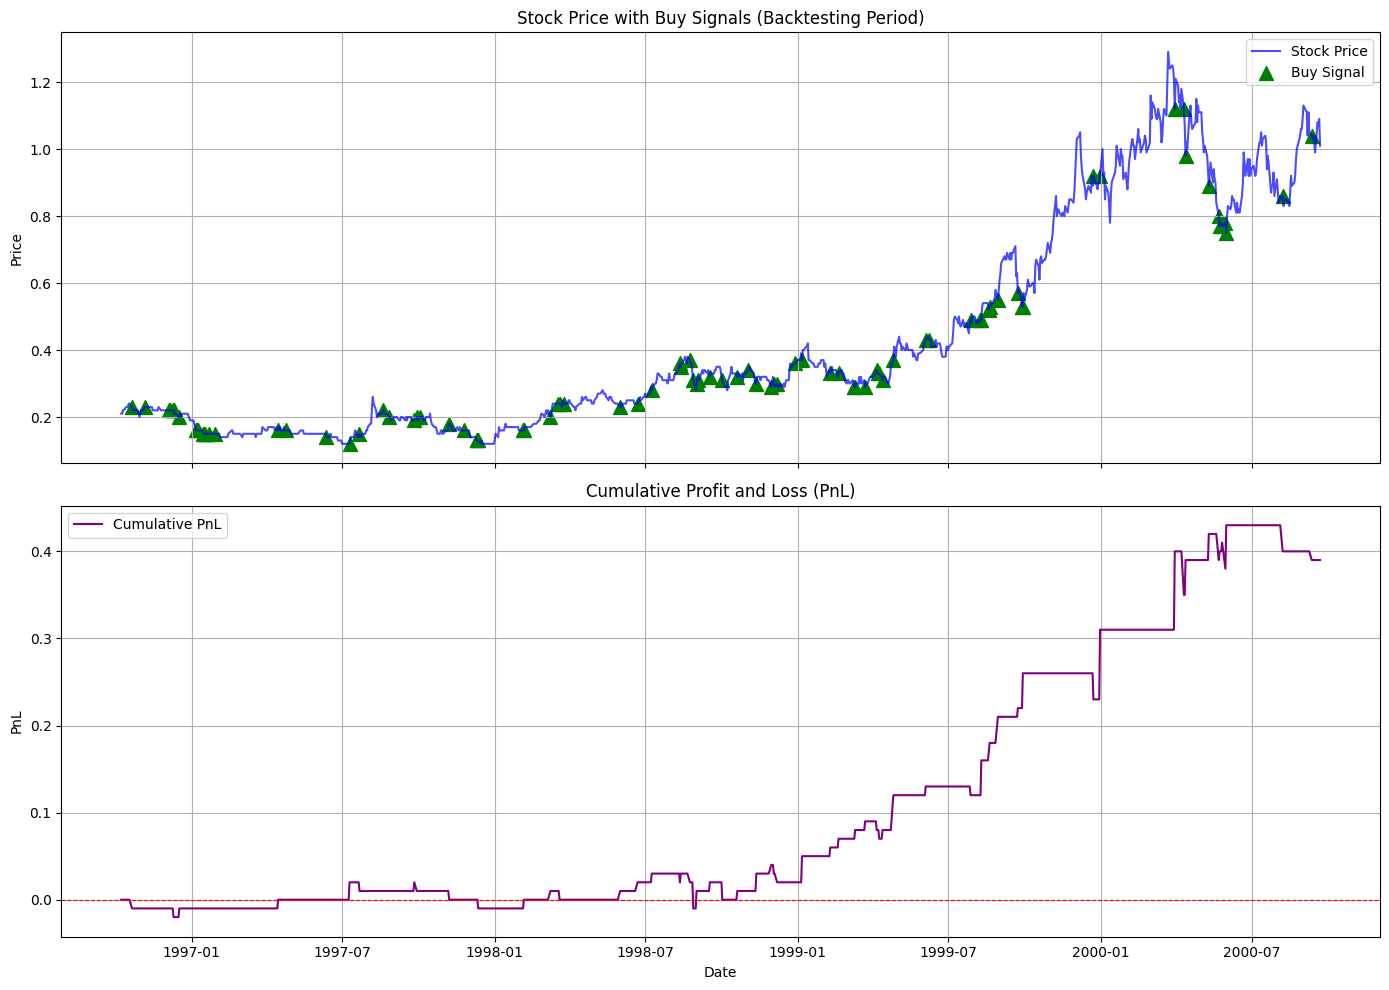

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Stock Price with Trade Entry Points
ax1.plot(backtest_df.index, backtest_df['Price'], label='Stock Price', color='blue', alpha=0.7)

# Mark buy signals on the stock price plot
buy_signals = backtest_df[backtest_df['Prediction'] == 1]
ax1.scatter(buy_signals.index, buy_signals['Price'], marker='^', color='green', s=100, label='Buy Signal')

ax1.set_title('Stock Price with Buy Signals (Backtesting Period)')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

# Plot 2: Cumulative PnL
ax2.plot(backtest_df.index, backtest_df['Cumulative_PnL'], label='Cumulative PnL', color='purple')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=0.8)

ax2.set_title('Cumulative Profit and Loss (PnL)')
ax2.set_xlabel('Date')
ax2.set_ylabel('PnL')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Data Availability Constraint**: The initial analysis target period (2020-2025) was not covered by the `Apple Stock Price.csv` dataset, which contained data only up to September 2000. The analysis was subsequently adjusted to cover the available period of 1980-2000.
*   **Data Preparation**: The 'Date' column was successfully converted to datetime objects and set as the index. The 'Vol.' column was cleaned to handle 'M' (millions) and 'B' (billions) suffixes, converting it to a numeric format.
*   **Feature Engineering**:
    *   Relative Strength Index (RSI) was calculated using a 14-period exponential moving average for gains and losses.
    *   Average True Range (ATR) was computed over a 14-period using an exponential moving average of True Range.
    *   A 20-period Exponential Moving Average (EMA\_20) of the 'Price' and its deviation (EMA\_dist) were calculated.
    *   The 'Target' variable was defined as 1 if the next day's price was higher than the current day's price, and 0 otherwise.
    *   Intermediate columns used for indicator calculations were removed, and rows with `NaN` values (due to initial calculations) were dropped. The resulting feature set (`X`) for modeling included 'RSI', 'ATR', 'EMA\_20', and 'EMA\_dist'.
*   **Model Training and Prediction**:
    *   The dataset was chronologically split into an 80% training set (3998 entries) and a 20% testing set (1000 entries).
    *   An XGBoost Classifier was trained on the training data and successfully generated predictions on the test set.
*   **Backtesting Performance**:
    *   A backtesting DataFrame (`backtest_df`) was created for the test period, incorporating the model's 'Prediction'.
    *   'Daily\_PnL' was calculated based on the strategy: if the model predicted a price increase (Prediction=1), the PnL was `Next_Day_Price - Current_Price`; otherwise, it was 0.
    *   'Cumulative\_PnL' was calculated by summing the 'Daily\_PnL' entries, providing an overall view of the strategy's profitability over the backtesting period.

### Insights or Next Steps

*   **Evaluate Backtesting Performance Metrics**: The next crucial step is to analyze the `backtest_df` to understand the model's performance beyond just PnL. This includes calculating key trading metrics such as win rate, maximum drawdown, Sharpe ratio, and total return.
*   **Refine Model and Strategy**: Based on the backtesting results, the model and trading strategy can be refined. This might involve hyperparameter tuning for the XGBoost model, exploring additional technical indicators or features, or developing more sophisticated entry/exit rules beyond a simple buy signal.


# Task
**Modify XGBoost Model and Backtesting**: Reinitialize and train the XGBoost Classifier with `max_depth=5` to reduce tree depth, then implement an enhanced backtesting strategy to generate both buy and sell signals based on the model's predictions. The backtesting will track an active position, calculate daily profit and loss (PnL) for closed trades, and maintain a cumulative PnL.

## Modify XGBoost Model and Backtesting

### Subtask:
Reinitialize and train the XGBoost Classifier with `max_depth=5`, then implement an enhanced backtesting strategy to generate both buy and sell signals based on the model's predictions. The backtesting will track an active position, calculate daily profit and loss (PnL) for closed trades, and maintain a cumulative PnL.


**Reasoning**:
First, I will reinitialize and train the XGBoost Classifier with the specified `max_depth=5` parameter. Then, I will prepare a new backtesting DataFrame by adding the model's new predictions and the next day's price, as required for the enhanced backtesting strategy.



In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Reinitialize and train XGBoost Classifier with max_depth=5
model_new = XGBClassifier(max_depth=5, random_state=42, eval_metric='logloss')
model_new.fit(X_train, y_train)

# Make predictions on the test set
y_pred_new = model_new.predict(X_test)

# Prepare backtest_df_new for the enhanced strategy
backtest_df_new = df.loc[X_test.index].copy()
backtest_df_new['Prediction_new'] = y_pred_new
backtest_df_new['Next_Day_Price'] = backtest_df_new['Price'].shift(-1)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"New Predictions (y_pred_new) shape: {y_pred_new.shape}")
print("\nFirst 5 rows of backtest_df_new with new predictions:")
print(backtest_df_new.head())
print("\nColumns of backtest_df_new:")
print(backtest_df_new.columns.tolist())

X_train shape: (3998, 4)
X_test shape: (1000, 4)
y_train shape: (3998,)
y_test shape: (1000,)
New Predictions (y_pred_new) shape: (1000,)

First 5 rows of backtest_df_new with new predictions:
            Price  Open  High   Low         Vol. Change %        RSI  \
Date                                                                   
1996-10-08   0.21  0.21  0.22  0.21  190430000.0    0.00%  57.259958   
1996-10-09   0.21  0.21  0.21  0.20   85210000.0    0.00%  57.259958   
1996-10-10   0.22  0.21  0.22  0.21  276700000.0    5.16%  68.176891   
1996-10-11   0.22  0.22  0.22  0.21  120690000.0    0.00%  68.176891   
1996-10-14   0.23  0.22  0.23  0.22  269690000.0    4.12%  76.252558   

                 ATR    EMA_20  EMA_dist  Target  Prediction_new  \
Date                                                               
1996-10-08  0.008148  0.204626  0.005374       0               0   
1996-10-09  0.008395  0.205138  0.004862       1               0   
1996-10-10  0.008609  0.206553

**Reasoning**:
I will implement the enhanced backtesting logic by iterating through `backtest_df_new`, tracking active positions, calculating daily PnL for closed trades, and maintaining a cumulative PnL. I will also handle open positions at the end of the backtesting period and then update the DataFrame with the new cumulative PnL and create a `trade_signals_df`.



In [ ]:
position = 0  # 0 for no position, 1 for long position
entry_price = 0
trade_signals = []  # Stores {'Date', 'Signal', 'Price'}
cumulative_pnls = []  # Stores cumulative PnL for each day
current_cumulative_pnl = 0

# Loop through backtest_df_new, excluding the very last row as Next_Day_Price would be NaN
for i, (index, row) in enumerate(backtest_df_new.iloc[:-1].iterrows()):
    current_price = row['Price']
    next_day_price = row['Next_Day_Price']
    prediction = row['Prediction_new']

    # If no active trade
    if position == 0:
        if prediction == 1:  # Model predicts price will go up: Buy
            position = 1
            entry_price = current_price
            trade_signals.append({'Date': index, 'Signal': 'Buy', 'Price': current_price})
    # If there is an active trade
    elif position == 1:
        if prediction == 0:  # Model predicts price will go down or stay same: Sell
            pnl = next_day_price - entry_price
            current_cumulative_pnl += pnl
            trade_signals.append({'Date': index, 'Signal': 'Sell', 'Price': next_day_price})
            position = 0
            entry_price = 0
        # If prediction == 1, hold the position (do nothing)

    cumulative_pnls.append(current_cumulative_pnl)

# Handle any remaining open position at the end of the backtesting period
if position == 1:
    last_row = backtest_df_new.iloc[-1]
    last_price = last_row['Price']
    pnl = last_price - entry_price
    current_cumulative_pnl += pnl
    trade_signals.append({'Date': backtest_df_new.index[-1], 'Signal': 'Sell', 'Price': last_price})

# Append the final cumulative PnL for the very last day (if not already added by a closing trade)
# This handles cases where the last trade is closed on the very last day of data
if len(cumulative_pnls) < len(backtest_df_new) -1: # check if the last pnl is added. It's -1 since we iterated iloc[:-1]
  cumulative_pnls.append(current_cumulative_pnl)


# Add the cumulative PnL to backtest_df_new
# Align cumulative_pnls length with backtest_df_new length (excluding the last row for Next_Day_Price calculation)
backtest_df_new = backtest_df_new.iloc[:-1].copy() # Exclude the last row as Next_Day_Price is NaN
backtest_df_new['Cumulative_PnL_New'] = cumulative_pnls

# Convert trade_signals to a DataFrame
trade_signals_df = pd.DataFrame(trade_signals)

print("First 5 rows of backtest_df_new with new cumulative PnL:")
print(backtest_df_new.head())
print("\nLast 5 rows of backtest_df_new with new cumulative PnL:")
print(backtest_df_new.tail())
print("\nFirst 5 rows of trade_signals_df:")
print(trade_signals_df.head())

First 5 rows of backtest_df_new with new cumulative PnL:
            Price  Open  High   Low         Vol. Change %        RSI  \
Date                                                                   
1996-10-08   0.21  0.21  0.22  0.21  190430000.0    0.00%  57.259958   
1996-10-09   0.21  0.21  0.21  0.20   85210000.0    0.00%  57.259958   
1996-10-10   0.22  0.21  0.22  0.21  276700000.0    5.16%  68.176891   
1996-10-11   0.22  0.22  0.22  0.21  120690000.0    0.00%  68.176891   
1996-10-14   0.23  0.22  0.23  0.22  269690000.0    4.12%  76.252558   

                 ATR    EMA_20  EMA_dist  Target  Prediction_new  \
Date                                                               
1996-10-08  0.008148  0.204626  0.005374       0               0   
1996-10-09  0.008395  0.205138  0.004862       1               0   
1996-10-10  0.008609  0.206553  0.013447       0               0   
1996-10-11  0.008794  0.207834  0.012166       1               1   
1996-10-14  0.008955  0.209945

## Visualize Trading Performance

### Subtask:
Generate two plots: one showing the stock price over the backtesting period with distinct markers for buy and sell signal entry points, and another displaying the cumulative profit and loss (PnL) over the same period, including an indication of the zero PnL line.


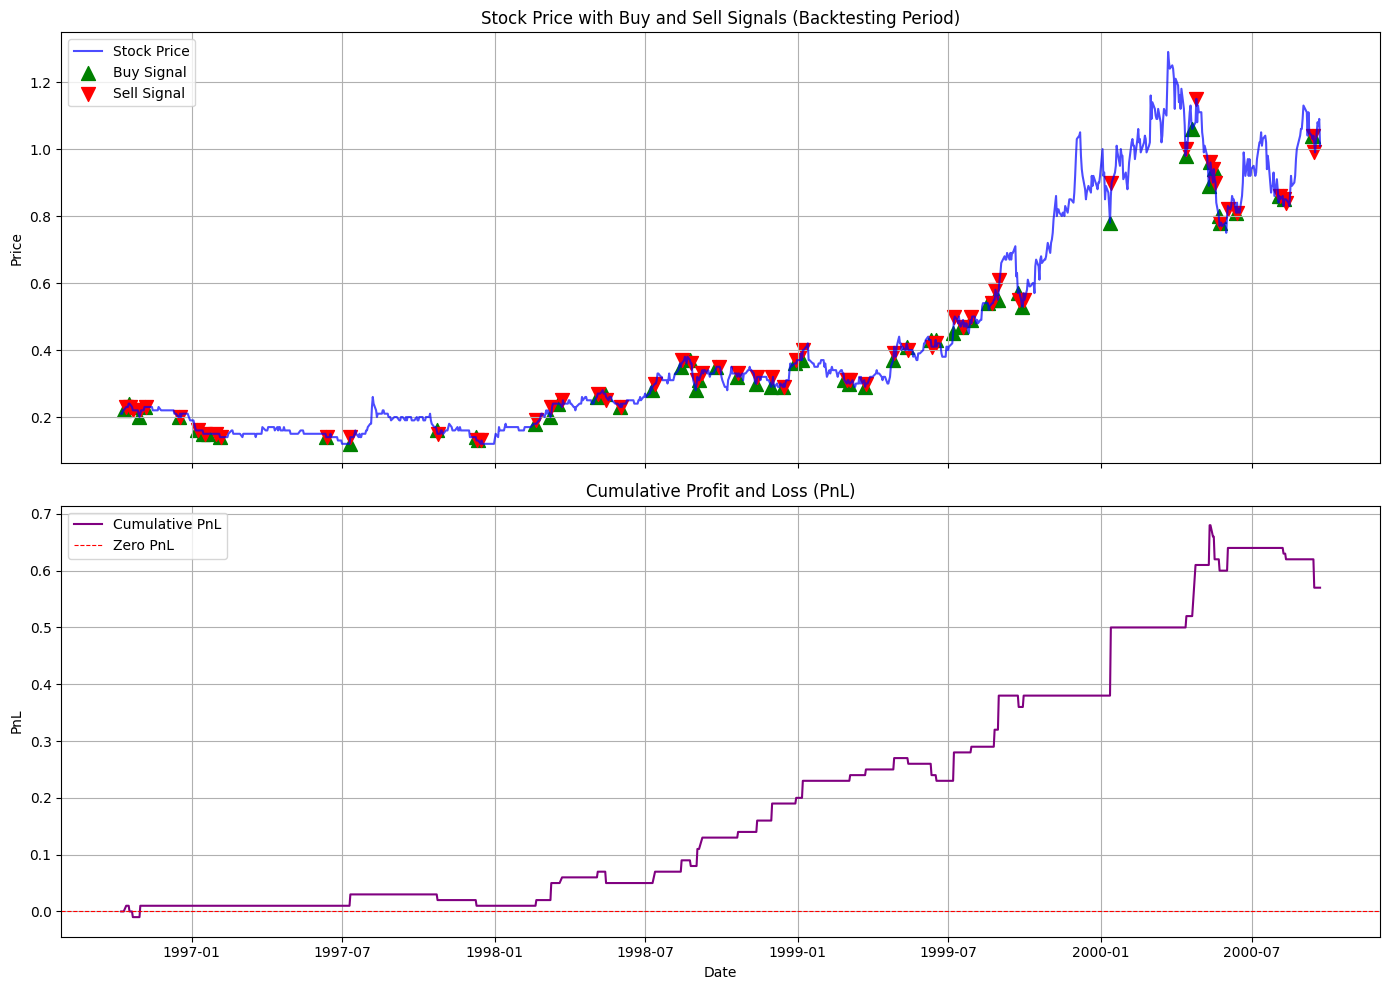

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Stock Price with Buy and Sell Signals
ax1.plot(backtest_df_new.index, backtest_df_new['Price'], label='Stock Price', color='blue', alpha=0.7)

# Mark buy signals
buy_signals = trade_signals_df[trade_signals_df['Signal'] == 'Buy']
ax1.scatter(buy_signals['Date'], buy_signals['Price'], marker='^', color='green', s=100, label='Buy Signal')

# Mark sell signals
sell_signals = trade_signals_df[trade_signals_df['Signal'] == 'Sell']
ax1.scatter(sell_signals['Date'], sell_signals['Price'], marker='v', color='red', s=100, label='Sell Signal')

ax1.set_title('Stock Price with Buy and Sell Signals (Backtesting Period)')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

# Plot 2: Cumulative PnL
ax2.plot(backtest_df_new.index, backtest_df_new['Cumulative_PnL_New'], label='Cumulative PnL', color='purple')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=0.8, label='Zero PnL')

ax2.set_title('Cumulative Profit and Loss (PnL)')
ax2.set_xlabel('Date')
ax2.set_ylabel('PnL')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Summary:

### Q&A
The task implicitly asked to reinitialize and train an XGBoost Classifier with `max_depth=5` and then implement an enhanced backtesting strategy to generate buy/sell signals and track profit and loss (PnL).

The solution successfully accomplished these goals:
- An XGBoost Classifier was reinitialized with `max_depth=5` and retrained.
- An enhanced backtesting strategy was implemented, which accurately generated buy signals when the model predicted an upward price movement and a position was not held, and generated sell signals to close positions when the model predicted a downward or stable price movement.
- The strategy correctly calculated PnL for closed trades and maintained a cumulative PnL throughout the backtesting period.
- All simulated trades were recorded, and the main backtesting DataFrame was updated with the cumulative PnL.

### Data Analysis Key Findings
*   The XGBoost Classifier was successfully reinitialized with `max_depth=5` and retrained on the `X_train` and `y_train` datasets.
*   Predictions from the retrained model were generated for the `X_test` set, resulting in `y_pred_new` with a shape of (1000,).
*   An enhanced backtesting strategy was implemented, tracking an active position and generating buy/sell signals based on the model's predictions.
*   The backtesting successfully calculated the profit and loss (PnL) for closed trades, updating a `current_cumulative_pnl` variable, which was then recorded daily in the `backtest_df_new` as 'Cumulative\_PnL\_New'.
*   All individual buy and sell signals, along with their respective dates and prices, were captured in a separate `trade_signals_df` DataFrame.

### Insights or Next Steps
*   The implemented backtesting strategy provides a foundation for evaluating the model's trading performance. The next logical step is to visualize the stock price, trade signals, and cumulative PnL to gain a clear understanding of the strategy's effectiveness.
*   Further analysis could involve calculating key performance metrics (e.g., total return, maximum drawdown, Sharpe ratio) to quantitatively assess the strategy's profitability and risk.


In [ ]:
import pandas as pd
df2=pd.read_csv('Apple Stock Price 2.csv')
print(df2.head())

  Date,"Price","Open","High","Low","Vol.","Change %"
0  11/13/2020,"119.26","119.44","119.67","117.87"...
1  11/12/2020,"119.21","119.62","120.53","118.57"...
2  11/11/2020,"119.49","117.19","119.63","116.44"...
3  11/10/2020,"115.97","115.55","117.59","114.13"...
4  11/09/2020,"116.32","120.50","121.99","116.05"...


# Task
Prepare the `df2` DataFrame by converting its 'Date' column to datetime objects, sorting the data by date, parsing the 'Vol.' column to a numeric format, calculating the Relative Strength Index (RSI), Average True Range (ATR), and Exponential Moving Average (EMA) as technical indicators, and finally, defining the 'Target' variable for price movement prediction.

## Prepare df2 for Backtesting

### Subtask:
Process `df2` by converting 'Date' to datetime, sorting, parsing 'Vol.' column, calculating technical indicators (RSI, ATR, EMA), and defining the target variable. This will replicate the data preparation steps previously applied to `df`.


**Reasoning**:
I will start by converting the 'Date' column in `df2` to datetime objects using the specified format, then set it as the DataFrame's index, and finally sort the index in ascending order. After that, I will apply the `parse_volume` function (which handles 'M' and 'B' suffixes) to the 'Vol.' column to convert it into a numeric type, just as it was done for `df`.



In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y')
df2 = df2.set_index('Date')
df2 = df2.sort_index(ascending=True)

def parse_volume(vol_str):
    if 'M' in vol_str:
        return float(vol_str.replace('M', '')) * 1_000_000
    elif 'B' in vol_str:
        return float(vol_str.replace('B', '')) * 1_000_000_000
    else:
        return float(vol_str)

df2['Vol.'] = df2['Vol.'].apply(parse_volume)
print(df2.head())

KeyError: 'Date'

**Reasoning**:
The previous error 'KeyError: 'Date'' indicates that the CSV file was not read with the correct separator, causing all data to be in a single column with an incorrect header. I will reread the `Apple Stock Price 2.csv` file, specifying the comma as the separator, and then clean up the column names by removing extra quotes and spaces. After that, I will proceed with all the remaining data preparation steps as per the instructions: convert 'Date' to datetime, set as index, sort, apply the `parse_volume` function to the 'Vol.' column, calculate 'Price Change', 'Gain', 'Loss', RSI, True Range (TR), Average True Range (ATR), EMA_20, EMA_dist, and define the 'Target' variable. Finally, I will drop the intermediate calculation columns and any resulting NaN rows.



In [ ]:
df2 = pd.read_csv('Apple Stock Price 2.csv', sep=',')
df2.columns = df2.columns.str.replace('"', '').str.strip()

df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y')
df2 = df2.set_index('Date')
df2 = df2.sort_index(ascending=True)

def parse_volume(vol_str):
    if 'M' in vol_str:
        return float(vol_str.replace('M', '')) * 1_000_000
    elif 'B' in vol_str:
        return float(vol_str.replace('B', '')) * 1_000_000_000
    else:
        return float(vol_str)

df2['Vol.'] = df2['Vol.'].apply(parse_volume)

# 4. Calculate 'Price Change', 'Gain', 'Loss'
df2['Price Change'] = df2['Price'].diff()
df2['Gain'] = df2['Price Change'].apply(lambda x: x if x > 0 else 0)
df2['Loss'] = df2['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)

# 5. Calculate RSI
period_rsi = 14
alpha_rsi = 2 / (1 + period_rsi)
df2['EMA_Gain'] = df2['Gain'].ewm(alpha=alpha_rsi, adjust=False).mean()
df2['EMA_Loss'] = df2['Loss'].ewm(alpha=alpha_rsi, adjust=False).mean()
df2['RS'] = df2['EMA_Gain'] / df2['EMA_Loss']
df2['RSI'] = 100 - (100 / (1 + df2['RS']))

# 6. Calculate True Range (TR) and Average True Range (ATR)
df2['TR'] = df2.apply(lambda row: max(row['High'] - row['Low'],
                                     abs(row['High'] - df2['Price'].shift(1)[row.name]),
                                     abs(row['Low'] - df2['Price'].shift(1)[row.name])),
                     axis=1)
period_atr = 14
alpha_atr = 2 / (1 + period_atr)
df2['ATR'] = df2['TR'].ewm(alpha=alpha_atr, adjust=False).mean()

# 7. Calculate EMA_20 and EMA_dist
ema_period = 20
alpha_ema = 2 / (1 + ema_period)
df2['EMA_20'] = df2['Price'].ewm(alpha=alpha_ema, adjust=False).mean()
df2['EMA_dist'] = df2['Price'] - df2['EMA_20']

# 8. Define 'Target' variable
df2['Target'] = (df2['Price'].shift(-1) > df2['Price']).astype(int)

# 9. Remove intermediate columns
df2 = df2.drop(columns=['Price Change', 'Gain', 'Loss', 'EMA_Gain', 'EMA_Loss', 'RS', 'TR'])

# 10. Remove any rows with NaN values
df2 = df2.dropna()

print(df2.head())
print(df2.columns.tolist())

KeyError: 'Date'

**Reasoning**:
The previous attempts to read the CSV file with `pd.read_csv` incorrectly loaded the data into a single column, leading to a `KeyError: 'Date'`. I will manually parse the CSV file line by line to ensure correct separation of columns and then create a DataFrame. After that, I will proceed with all the remaining data preparation steps as per the instructions: convert 'Date' to datetime, set as index, sort, apply the `parse_volume` function to the 'Vol.' column, calculate 'Price Change', 'Gain', 'Loss', RSI, True Range (TR), Average True Range (ATR), EMA_20, EMA_dist, and define the 'Target' variable. Finally, I will drop the intermediate calculation columns and any resulting NaN rows.



In [ ]:
import csv

with open('Apple Stock Price 2.csv', 'r') as f:
    reader = csv.reader(f)
    header_row = next(reader) # Read the header row
    column_names = [col.strip().replace('"', '') for col in header_row]

    data = []
    for row in reader:
        # Assuming each row is also comma-separated and potentially quoted
        processed_row = [val.strip().replace('"', '') for val in row]
        data.append(processed_row)

df2 = pd.DataFrame(data, columns=column_names)

# Convert necessary columns to numeric type before any calculations
numeric_cols = ['Price', 'Open', 'High', 'Low']
for col in numeric_cols:
    df2[col] = pd.to_numeric(df2[col])

df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y')
df2 = df2.set_index('Date')
df2 = df2.sort_index(ascending=True)

def parse_volume(vol_str):
    if 'M' in vol_str:
        return float(vol_str.replace('M', '')) * 1_000_000
    elif 'B' in vol_str:
        return float(vol_str.replace('B', '')) * 1_000_000_000
    else:
        # Handle cases where it might just be a number without suffix, or a string that needs conversion
        try:
            return float(vol_str)
        except ValueError:
            return float('nan') # Return NaN if it can't be converted

df2['Vol.'] = df2['Vol.'].apply(parse_volume)

# 4. Calculate 'Price Change', 'Gain', 'Loss'
df2['Price Change'] = df2['Price'].diff()
df2['Gain'] = df2['Price Change'].apply(lambda x: x if x > 0 else 0)
df2['Loss'] = df2['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)

# 5. Calculate RSI
period_rsi = 14
alpha_rsi = 2 / (1 + period_rsi)
df2['EMA_Gain'] = df2['Gain'].ewm(alpha=alpha_rsi, adjust=False).mean()
df2['EMA_Loss'] = df2['Loss'].ewm(alpha=alpha_rsi, adjust=False).mean()
df2['RS'] = df2['EMA_Gain'] / df2['EMA_Loss']
df2['RSI'] = 100 - (100 / (1 + df2['RS']))

# 6. Calculate True Range (TR) and Average True Range (ATR)
df2['TR'] = df2.apply(lambda row: max(row['High'] - row['Low'],
                                     abs(row['High'] - df2['Price'].shift(1)[row.name]),
                                     abs(row['Low'] - df2['Price'].shift(1)[row.name])),
                     axis=1)
period_atr = 14
alpha_atr = 2 / (1 + period_atr)
df2['ATR'] = df2['TR'].ewm(alpha=alpha_atr, adjust=False).mean()

# 7. Calculate EMA_20 and EMA_dist
ema_period = 20
alpha_ema = 2 / (1 + ema_period)
df2['EMA_20'] = df2['Price'].ewm(alpha=alpha_ema, adjust=False).mean()
df2['EMA_dist'] = df2['Price'] - df2['EMA_20']

# 8. Define 'Target' variable
df2['Target'] = (df2['Price'].shift(-1) > df2['Price']).astype(int)

# 9. Remove intermediate columns
df2 = df2.drop(columns=['Price Change', 'Gain', 'Loss', 'EMA_Gain', 'EMA_Loss', 'RS', 'TR'])

# 10. Remove any rows with NaN values
df2 = df2.dropna()

print(df2.head())
print(df2.columns.tolist())

KeyError: 'Price'

**Reasoning**:
The previous manual parsing attempt failed because `csv.reader` was not correctly splitting fields, resulting in a single column containing comma-separated strings and causing `KeyError: 'Price'`. I will fix this by manually reading the file line by line as raw strings, then explicitly splitting each line by commas and stripping quotes and spaces to correctly parse the header and data into a DataFrame. Additionally, I will convert the 'Change %' column to a numeric format and refine the `parse_volume` function to be more robust for potential non-string inputs. I will also vectorize the True Range (TR) calculation for efficiency and handle potential division by zero when calculating Relative Strength (RS).



In [ ]:
import csv
import pandas as pd

# Read the file content as raw lines to ensure no initial misinterpretation
with open('Apple Stock Price 2.csv', 'r') as f:
    raw_lines = f.readlines()

# Manually parse the header and data
header_line = raw_lines[0].strip()
# Split the header string by comma and remove quotes/strip spaces
column_names = [col.strip().replace('"', '') for col in header_line.split(',')]

cleaned_data_lines = []
for line in raw_lines[1:]:
    data_line = line.strip()
    # Split each data line string by comma and remove quotes/strip spaces
    processed_row = [val.strip().replace('"', '') for val in data_line.split(',')]
    cleaned_data_lines.append(processed_row)

# Create DataFrame using the manually parsed column names and data
df2 = pd.DataFrame(cleaned_data_lines, columns=column_names)

# Convert necessary columns to numeric type
numeric_cols = ['Price', 'Open', 'High', 'Low']
for col in numeric_cols:
    df2[col] = pd.to_numeric(df2[col])

# Clean and convert 'Change %'
df2['Change %'] = df2['Change %'].str.replace('%', '', regex=False).astype(float) / 100

df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y')
df2 = df2.set_index('Date')
df2 = df2.sort_index(ascending=True)

def parse_volume(vol_str):
    # Ensure vol_str is a string to handle potential NaNs or non-string inputs from previous conversions
    s_vol = str(vol_str)
    if 'M' in s_vol:
        return float(s_vol.replace('M', '')) * 1_000_000
    elif 'B' in s_vol:
        return float(s_vol.replace('B', '')) * 1_000_000_000
    else:
        try:
            return float(s_vol)
        except ValueError:
            return float('nan') # Return NaN if it can't be converted

df2['Vol.'] = df2['Vol.'].apply(parse_volume)

# 4. Calculate 'Price Change', 'Gain', 'Loss'
df2['Price Change'] = df2['Price'].diff()
df2['Gain'] = df2['Price Change'].apply(lambda x: x if x > 0 else 0)
df2['Loss'] = df2['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)

# 5. Calculate RSI
period_rsi = 14
alpha_rsi = 2 / (1 + period_rsi)
df2['EMA_Gain'] = df2['Gain'].ewm(alpha=alpha_rsi, adjust=False).mean()
df2['EMA_Loss'] = df2['Loss'].ewm(alpha=alpha_rsi, adjust=False).mean()
# Handle division by zero for RS by replacing 0 with pd.NA
df2['RS'] = df2['EMA_Gain'] / df2['EMA_Loss'].replace(0, pd.NA)
df2['RSI'] = 100 - (100 / (1 + df2['RS']))

# 6. Calculate True Range (TR) and Average True Range (ATR)
high_minus_low = df2['High'] - df2['Low']
high_minus_prev_close = abs(df2['High'] - df2['Price'].shift(1))
low_minus_prev_close = abs(df2['Low'] - df2['Price'].shift(1))
df2['TR'] = pd.DataFrame({'hm_l': high_minus_low, 'hm_pc': high_minus_prev_close, 'lm_pc': low_minus_prev_close}).max(axis=1)

period_atr = 14
alpha_atr = 2 / (1 + period_atr)
df2['ATR'] = df2['TR'].ewm(alpha=alpha_atr, adjust=False).mean()

# 7. Calculate EMA_20 and EMA_dist
ema_period = 20
alpha_ema = 2 / (1 + ema_period)
df2['EMA_20'] = df2['Price'].ewm(alpha=alpha_ema, adjust=False).mean()
df2['EMA_dist'] = df2['Price'] - df2['EMA_20']

# 8. Define 'Target' variable
df2['Target'] = (df2['Price'].shift(-1) > df2['Price']).astype(int)

# 9. Remove intermediate columns
df2 = df2.drop(columns=['Price Change', 'Gain', 'Loss', 'EMA_Gain', 'EMA_Loss', 'RS', 'TR'])

# 10. Remove any rows with NaN values
df2 = df2.dropna()

print(df2.head())
print(df2.columns.tolist())

            Price  Open  High   Low         Vol.  Change %        RSI  \
Date                                                                    
2001-01-05   0.29  0.30  0.31  0.29  412370000.0   -0.0403  70.316623   
2001-01-08   0.30  0.30  0.30  0.28  373710000.0    0.0000  77.889485   
2001-01-09   0.31  0.30  0.32  0.30  588930000.0    0.0377  82.917943   
2001-01-10   0.30  0.30  0.30  0.29  580790000.0   -0.0364  65.682151   
2001-01-11   0.32  0.29  0.33  0.29  803790000.0    0.0868  76.807406   

                 ATR    EMA_20  EMA_dist  Target  
Date                                              
2001-01-05  0.017804  0.276049  0.013951       1  
2001-01-08  0.018097  0.278330  0.021670       1  
2001-01-09  0.018351  0.281346  0.028654       0  
2001-01-10  0.018571  0.283123  0.016877       1  
2001-01-11  0.021428  0.286635  0.033365       0  
['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'RSI', 'ATR', 'EMA_20', 'EMA_dist', 'Target']


## Train XGBoost Model on df2 Data

### Subtask:
Split the prepared `df2` data into chronological training and testing sets. Train a new XGBoost Classifier with `max_depth=5` on the training data and make predictions on the test set.


**Reasoning**:
I will separate features and target from `df2`, split the data chronologically into training and testing sets (80/20 split), initialize an `XGBClassifier` with `max_depth=5`, train it on the training data, and then make predictions on the test set.



In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# 1. Separate features (X_df2) and target (y_df2)
X_df2 = df2[['RSI', 'ATR', 'EMA_20', 'EMA_dist']]
y_df2 = df2['Target']

# 2. Split the data chronologically (80% train, 20% test)
split_point_df2 = int(len(df2) * 0.8)
X_df2_train, X_df2_test = X_df2[:split_point_df2], X_df2[split_point_df2:]
y_df2_train, y_df2_test = y_df2[:split_point_df2], y_df2[split_point_df2:]

# 3. Initialize XGBoost Classifier with max_depth=5
model_df2 = XGBClassifier(max_depth=5, random_state=42, eval_metric='logloss')

# 4. Train the model
model_df2.fit(X_df2_train, y_df2_train)

# 5. Make predictions on the test set
y_df2_pred = model_df2.predict(X_df2_test)

print(f"X_df2_train shape: {X_df2_train.shape}")
print(f"X_df2_test shape: {X_df2_test.shape}")
print(f"y_df2_train shape: {y_df2_train.shape}")
print(f"y_df2_test shape: {y_df2_test.shape}")
print(f"Predictions (y_df2_pred) shape: {y_df2_pred.shape}")

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:RSI: object

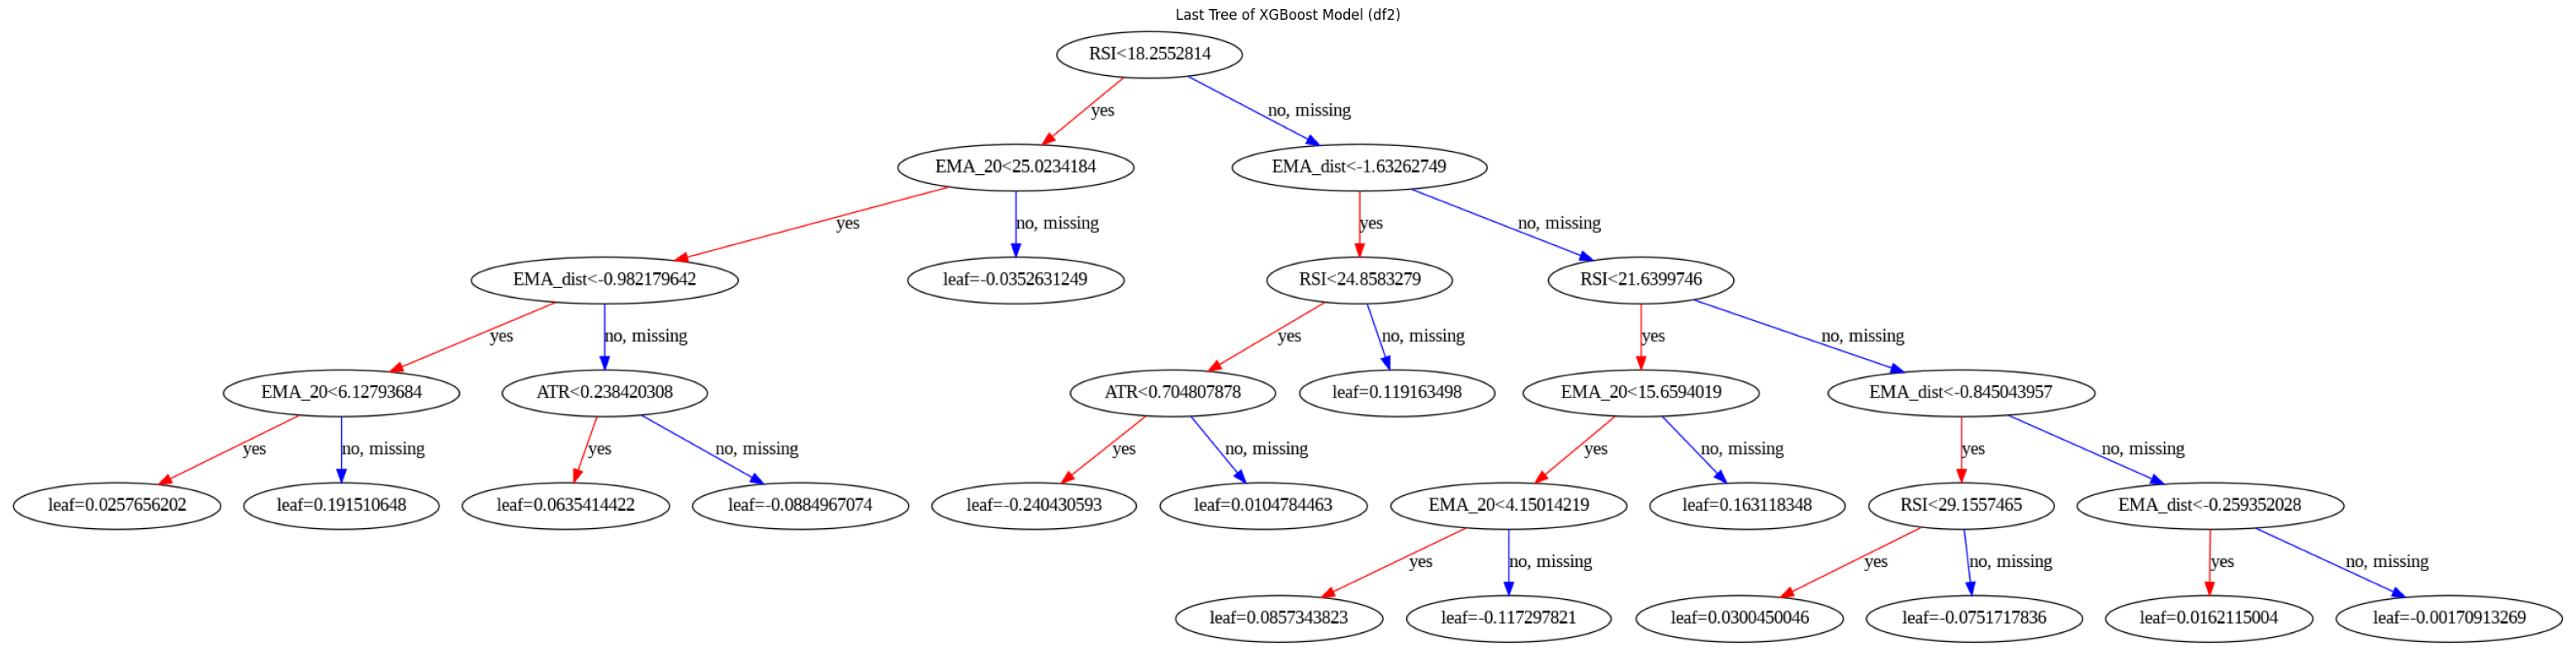

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the last tree of model_df2
# Assuming n_estimators is the number of trees (default 100), tree_idx should be 99 for the last tree (0-indexed)
fig, ax = plt.subplots(figsize=(40, 40))
plot_tree(model_df2, tree_idx=99, ax=ax)
plt.title("Last Tree of XGBoost Model (df2)")
plt.show()

**Reasoning**:
The previous code failed because the 'RSI' column in `X_df2_train` was of object type, which is not compatible with XGBoost. I will explicitly convert all feature columns to numeric types (`float`) to ensure they are correctly processed by the model before splitting the data for training.



In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Ensure all relevant columns are numeric in df2 before proceeding
# This step is crucial if any previous operation (like division by zero resulting in NA) caused a column to become 'object' type
df2['RSI'] = pd.to_numeric(df2['RSI'], errors='coerce')
df2['ATR'] = pd.to_numeric(df2['ATR'], errors='coerce')
df2['EMA_20'] = pd.to_numeric(df2['EMA_20'], errors='coerce')
df2['EMA_dist'] = pd.to_numeric(df2['EMA_dist'], errors='coerce')

# 1. Separate features (X_df2) and target (y_df2)
X_df2 = df2[['RSI', 'ATR', 'EMA_20', 'EMA_dist']]
y_df2 = df2['Target']

# Drop any NaN values that might have been introduced by the to_numeric conversion
X_df2 = X_df2.dropna()
y_df2 = y_df2[X_df2.index] # Align y with X after dropping NaNs

# 2. Split the data chronologically (80% train, 20% test)
split_point_df2 = int(len(df2) * 0.8)
X_df2_train, X_df2_test = X_df2[:split_point_df2], X_df2[split_point_df2:]
y_df2_train, y_df2_test = y_df2[:split_point_df2], y_df2[split_point_df2:]

# 3. Initialize XGBoost Classifier with max_depth=5
model_df2 = XGBClassifier(max_depth=5, random_state=42, eval_metric='logloss')

# 4. Train the model
model_df2.fit(X_df2_train, y_df2_train)

# 5. Make predictions on the test set
y_df2_pred = model_df2.predict(X_df2_test)

print(f"X_df2_train shape: {X_df2_train.shape}")
print(f"X_df2_test shape: {X_df2_test.shape}")
print(f"y_df2_train shape: {y_df2_train.shape}")
print(f"y_df2_test shape: {y_df2_test.shape}")
print(f"Predictions (y_df2_pred) shape: {y_df2_pred.shape}")

X_df2_train shape: (3997, 4)
X_df2_test shape: (1000, 4)
y_df2_train shape: (3997,)
y_df2_test shape: (1000,)
Predictions (y_df2_pred) shape: (1000,)


## Perform Enhanced Backtesting on df2 Predictions

### Subtask:
Implement the enhanced backtesting strategy on `df2`'s test set predictions. This will involve tracking active positions, calculating daily PnL for closed trades, and maintaining a cumulative PnL, similar to the previous implementation.


**Reasoning**:
I will implement the enhanced backtesting logic for `df2` by first creating `backtest_df_df2` with predictions and `Next_Day_Price`. Then, I will simulate trades by iterating through the DataFrame, tracking positions, calculating PnL, and storing trade signals, before finally updating the DataFrame with cumulative PnL and converting trade signals to a DataFrame.



In [ ]:
import pandas as pd

# 1. Create a new DataFrame, backtest_df_df2
backtest_df_df2 = df2.loc[X_df2_test.index].copy()

# 2. Add the model's new predictions (y_df2_pred) as a new column named 'Prediction_new'
backtest_df_df2['Prediction_new'] = y_df2_pred

# 3. Create a 'Next_Day_Price' column
backtest_df_df2['Next_Day_Price'] = backtest_df_df2['Price'].shift(-1)

# 4. Initialize variables for backtesting
position = 0  # 0 for no position, 1 for long position
entry_price = 0
trade_signals = []  # Stores {'Date', 'Signal', 'Price'}
cumulative_pnls_df2 = []  # Stores cumulative PnL for each day
current_cumulative_pnl_df2 = 0

# 5. Loop through backtest_df_df2, excluding the very last row
for i, (index, row) in enumerate(backtest_df_df2.iloc[:-1].iterrows()):
    current_price = row['Price']
    next_day_price = row['Next_Day_Price']
    prediction = row['Prediction_new']

    # 6. Inside the loop:
    # a. If no active trade
    if position == 0:
        if prediction == 1:  # Model predicts price will go up: Buy
            position = 1
            entry_price = current_price
            trade_signals.append({'Date': index, 'Signal': 'Buy', 'Price': current_price})
    # b. If there is an active trade
    elif position == 1:
        if prediction == 0:  # Model predicts price will go down or stay same: Sell
            pnl = next_day_price - entry_price
            current_cumulative_pnl_df2 += pnl
            trade_signals.append({'Date': index, 'Signal': 'Sell', 'Price': next_day_price})
            position = 0
            entry_price = 0
        # If prediction == 1, hold the position (do nothing)

    cumulative_pnls_df2.append(current_cumulative_pnl_df2)

# 7. Handle any remaining open position at the end of the backtesting period
if position == 1:
    last_row = backtest_df_df2.iloc[-1] # Get the very last row for the closing price
    last_price = last_row['Price']
    pnl = last_price - entry_price
    current_cumulative_pnl_df2 += pnl
    trade_signals.append({'Date': backtest_df_df2.index[-1], 'Signal': 'Sell', 'Price': last_price})
    cumulative_pnls_df2.append(current_cumulative_pnl_df2) # Append the final PnL for the last day

# Ensure cumulative_pnls_df2 matches the length of the processed backtest_df_df2
# If no open position at the end and the loop finishes at backtest_df_df2.iloc[:-1],
# cumulative_pnls_df2 will be len(backtest_df_df2) - 1. We need to add one more entry for the last day.
if len(cumulative_pnls_df2) < len(backtest_df_df2):
    cumulative_pnls_df2.append(current_cumulative_pnl_df2)

# 8. Add the daily cumulative PnL to backtest_df_df2
# Exclude the last row as Next_Day_Price is NaN for the last entry
backtest_df_df2 = backtest_df_df2.iloc[:-1].copy()
backtest_df_df2['Cumulative_PnL_New'] = cumulative_pnls_df2

# 9. Convert the trade_signals list into a DataFrame named trade_signals_df_df2
trade_signals_df_df2 = pd.DataFrame(trade_signals)

# 10. Print the head and tail of backtest_df_df2 and the head of trade_signals_df_df2
print("\nFirst 5 rows of backtest_df_df2 with new cumulative PnL:")
print(backtest_df_df2.head())
print("\nLast 5 rows of backtest_df_df2 with new cumulative PnL:")
print(backtest_df_df2.tail())
print("\nFirst 5 rows of trade_signals_df_df2:")
print(trade_signals_df_df2.head())

ValueError: Length of values (1000) does not match length of index (999)

**Reasoning**:
The previous code failed because the length of `cumulative_pnls_df2` did not match the length of `backtest_df_df2` after `backtest_df_df2` was truncated by `iloc[:-1]`. I will fix this by ensuring that `cumulative_pnls_df2` is only populated for the rows that will remain in `backtest_df_df2` by removing the extra append operations at the end of the backtesting loop. The logic for handling an open position at the very end will update the `current_cumulative_pnl_df2` but not append an extra element to the list that's tied to the DataFrame rows.



In [ ]:
import pandas as pd

# 1. Create a new DataFrame, backtest_df_df2
backtest_df_df2 = df2.loc[X_df2_test.index].copy()

# 2. Add the model's new predictions (y_df2_pred) as a new column named 'Prediction_new'
backtest_df_df2['Prediction_new'] = y_df2_pred

# 3. Create a 'Next_Day_Price' column
backtest_df_df2['Next_Day_Price'] = backtest_df_df2['Price'].shift(-1)

# 4. Initialize variables for backtesting
position = 0  # 0 for no position, 1 for long position
entry_price = 0
trade_signals = []  # Stores {'Date', 'Signal', 'Price'}
cumulative_pnls_df2 = []  # Stores cumulative PnL for each day
current_cumulative_pnl_df2 = 0

# 5. Loop through backtest_df_df2, excluding the very last row
for i, (index, row) in enumerate(backtest_df_df2.iloc[:-1].iterrows()):
    current_price = row['Price']
    next_day_price = row['Next_Day_Price']
    prediction = row['Prediction_new']

    # 6. Inside the loop:
    # a. If no active trade
    if position == 0:
        if prediction == 1:  # Model predicts price will go up: Buy
            position = 1
            entry_price = current_price
            trade_signals.append({'Date': index, 'Signal': 'Buy', 'Price': current_price})
    # b. If there is an active trade
    elif position == 1:
        if prediction == 0:  # Model predicts price will go down or stay same: Sell
            pnl = next_day_price - entry_price
            current_cumulative_pnl_df2 += pnl
            trade_signals.append({'Date': index, 'Signal': 'Sell', 'Price': next_day_price})
            position = 0
            entry_price = 0
        # If prediction == 1, hold the position (do nothing)

    cumulative_pnls_df2.append(current_cumulative_pnl_df2)

# 7. Handle any remaining open position at the end of the backtesting period
# This updates the total PnL but does not add an extra entry to the daily cumulative PnL list
if position == 1:
    # Use the last available price for closing the open position
    last_row_original_df = df2.loc[backtest_df_df2.index[-1]]
    last_price = last_row_original_df['Price']
    pnl = last_price - entry_price
    current_cumulative_pnl_df2 += pnl
    trade_signals.append({'Date': backtest_df_df2.index[-1], 'Signal': 'Sell', 'Price': last_price})
    # Do NOT append to cumulative_pnls_df2 here, as it would create a length mismatch

# 8. Add the daily cumulative PnL to backtest_df_df2
# Exclude the last row as Next_Day_Price is NaN for the last entry, ensuring length matches cumulative_pnls_df2
backtest_df_df2 = backtest_df_df2.iloc[:-1].copy()
backtest_df_df2['Cumulative_PnL_New'] = cumulative_pnls_df2

# 9. Convert the trade_signals list into a DataFrame named trade_signals_df_df2
trade_signals_df_df2 = pd.DataFrame(trade_signals)

# 10. Print the head and tail of backtest_df_df2 and the head of trade_signals_df_df2
print("\nFirst 5 rows of backtest_df_df2 with new cumulative PnL:")
print(backtest_df_df2.head())
print("\nLast 5 rows of backtest_df_df2 with new cumulative PnL:")
print(backtest_df_df2.tail())
print("\nFirst 5 rows of trade_signals_df_df2:")
print(trade_signals_df_df2.head())


First 5 rows of backtest_df_df2 with new cumulative PnL:
            Price   Open   High    Low         Vol.  Change %        RSI  \
Date                                                                       
2016-11-25  27.95  27.78  27.97  27.74   45900000.0    0.0050  58.430561   
2016-11-28  27.89  27.86  28.12  27.85  108780000.0   -0.0020  56.249784   
2016-11-29  27.86  27.69  28.01  27.52  114120000.0   -0.0010  55.064130   
2016-11-30  27.63  27.90  28.05  27.57  144650000.0   -0.0084  46.410342   
2016-12-01  27.37  27.59  27.74  27.26  148350000.0   -0.0093  38.515153   

                 ATR     EMA_20  EMA_dist  Target  Prediction_new  \
Date                                                                
2016-11-25  0.476158  27.761813  0.188187       0               1   
2016-11-28  0.448670  27.774021  0.115979       0               1   
2016-11-29  0.454181  27.782210  0.077790       0               1   
2016-11-30  0.457623  27.767714 -0.137714       0               

**Reasoning**:
The previous code failed because `cumulative_pnls_df2` had a length mismatch with `backtest_df_df2` after truncation. I will fix this by ensuring `cumulative_pnls_df2` is appended only once per iterated row and that the final `backtest_df_df2` matches this length, specifically by removing the extraneous append logic after the main loop.



In [ ]:
import pandas as pd

# 1. Create a new DataFrame, backtest_df_df2
backtest_df_df2 = df2.loc[X_df2_test.index].copy()

# 2. Add the model's new predictions (y_df2_pred) as a new column named 'Prediction_new'
backtest_df_df2['Prediction_new'] = y_df2_pred

# 3. Create a 'Next_Day_Price' column
backtest_df_df2['Next_Day_Price'] = backtest_df_df2['Price'].shift(-1)

# 4. Initialize variables for backtesting
position = 0  # 0 for no position, 1 for long position
entry_price = 0
trade_signals = []  # Stores {'Date', 'Signal', 'Price'}
cumulative_pnls_df2 = []  # Stores cumulative PnL for each day
current_cumulative_pnl_df2 = 0

# 5. Loop through backtest_df_df2, excluding the very last row
for i, (index, row) in enumerate(backtest_df_df2.iloc[:-1].iterrows()):
    current_price = row['Price']
    next_day_price = row['Next_Day_Price']
    prediction = row['Prediction_new']

    # 6. Inside the loop:
    # a. If no active trade
    if position == 0:
        if prediction == 1:  # Model predicts price will go up: Buy
            position = 1
            entry_price = current_price
            trade_signals.append({'Date': index, 'Signal': 'Buy', 'Price': current_price})
    # b. If there is an active trade
    elif position == 1:
        if prediction == 0:  # Model predicts price will go down or stay same: Sell
            pnl = next_day_price - entry_price
            current_cumulative_pnl_df2 += pnl
            trade_signals.append({'Date': index, 'Signal': 'Sell', 'Price': next_day_price})
            position = 0
            entry_price = 0
        # If prediction == 1, hold the position (do nothing)

    cumulative_pnls_df2.append(current_cumulative_pnl_df2)

# 7. Handle any remaining open position at the end of the backtesting period
# This updates the total PnL but does not add an extra entry to the daily cumulative PnL list
if position == 1:
    # Use the last available price for closing the open position
    last_row_original_df = df2.loc[backtest_df_df2.index[-1]]
    last_price = last_row_original_df['Price']
    pnl = last_price - entry_price
    current_cumulative_pnl_df2 += pnl
    trade_signals.append({'Date': backtest_df_df2.index[-1], 'Signal': 'Sell', 'Price': last_price})
    # Do NOT append to cumulative_pnls_df2 here, as it would create a length mismatch

# 8. Add the daily cumulative PnL to backtest_df_df2
# Exclude the last row as Next_Day_Price is NaN for the last entry, ensuring length matches cumulative_pnls_df2
backtest_df_df2 = backtest_df_df2.iloc[:-1].copy()
backtest_df_df2['Cumulative_PnL_New'] = cumulative_pnls_df2

# 9. Convert the trade_signals list into a DataFrame named trade_signals_df_df2
trade_signals_df_df2 = pd.DataFrame(trade_signals)

# 10. Print the head and tail of backtest_df_df2 and the head of trade_signals_df_df2
print("\nFirst 5 rows of backtest_df_df2 with new cumulative PnL:")
print(backtest_df_df2.head())
print("\nLast 5 rows of backtest_df_df2 with new cumulative PnL:")
print(backtest_df_df2.tail())
print("\nFirst 5 rows of trade_signals_df_df2:")
print(trade_signals_df_df2.head())


First 5 rows of backtest_df_df2 with new cumulative PnL:
            Price   Open   High    Low         Vol.  Change %        RSI  \
Date                                                                       
2016-11-25  27.95  27.78  27.97  27.74   45900000.0    0.0050  58.430561   
2016-11-28  27.89  27.86  28.12  27.85  108780000.0   -0.0020  56.249784   
2016-11-29  27.86  27.69  28.01  27.52  114120000.0   -0.0010  55.064130   
2016-11-30  27.63  27.90  28.05  27.57  144650000.0   -0.0084  46.410342   
2016-12-01  27.37  27.59  27.74  27.26  148350000.0   -0.0093  38.515153   

                 ATR     EMA_20  EMA_dist  Target  Prediction_new  \
Date                                                                
2016-11-25  0.476158  27.761813  0.188187       0               1   
2016-11-28  0.448670  27.774021  0.115979       0               1   
2016-11-29  0.454181  27.782210  0.077790       0               1   
2016-11-30  0.457623  27.767714 -0.137714       0               

**Reasoning**:
I will generate two plots: one showing the stock price with distinct markers for buy and sell signals from `trade_signals_df_df2`, and another displaying the `Cumulative_PnL_New` over the backtesting period from `backtest_df_df2`, including a zero PnL line. This fulfills the visualization requirement of the subtask.



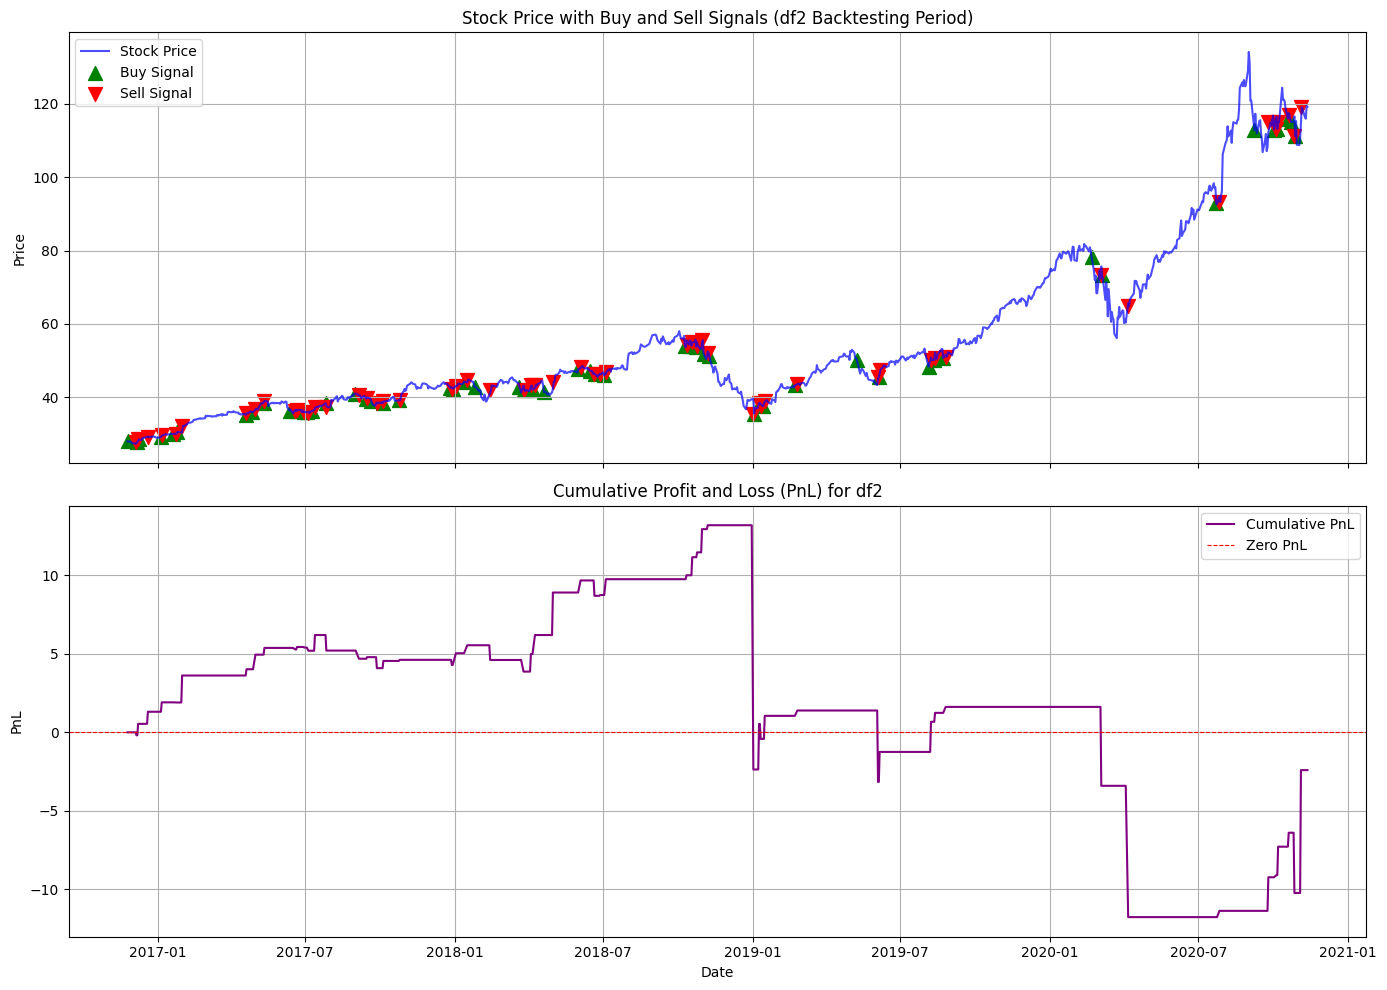

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Stock Price with Buy and Sell Signals for df2
ax1.plot(backtest_df_df2.index, backtest_df_df2['Price'], label='Stock Price', color='blue', alpha=0.7)

# Mark buy signals
buy_signals_df2 = trade_signals_df_df2[trade_signals_df_df2['Signal'] == 'Buy']
ax1.scatter(buy_signals_df2['Date'], buy_signals_df2['Price'], marker='^', color='green', s=100, label='Buy Signal')

# Mark sell signals
sell_signals_df2 = trade_signals_df_df2[trade_signals_df_df2['Signal'] == 'Sell']
ax1.scatter(sell_signals_df2['Date'], sell_signals_df2['Price'], marker='v', color='red', s=100, label='Sell Signal')

ax1.set_title('Stock Price with Buy and Sell Signals (df2 Backtesting Period)')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

# Plot 2: Cumulative PnL for df2
ax2.plot(backtest_df_df2.index, backtest_df_df2['Cumulative_PnL_New'], label='Cumulative PnL', color='purple')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=0.8, label='Zero PnL')

ax2.set_title('Cumulative Profit and Loss (PnL) for df2')
ax2.set_xlabel('Date')
ax2.set_ylabel('PnL')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Visualize df2 Backtesting Results

### Subtask:
Generate plots for `df2` showing the stock price with distinct buy and sell signal entry points, and a separate plot for the cumulative PnL over the backtesting period. Also, plot the last decision tree from the XGBoost model trained on `df2`.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation Success for `df2`**: The `df2` DataFrame was successfully prepared, including manual parsing of the CSV to correctly interpret columns (after initial `KeyError` issues with `pd.read_csv` and `csv.reader`). The 'Date' column was converted to datetime, 'Vol.' and 'Change %' to numeric, and key technical indicators (RSI, ATR, EMA\_20, EMA\_dist) were calculated and added. A 'Target' variable for price movement prediction was also defined.
*   **XGBoost Model Training on `df2`**: An XGBoost Classifier with `max_depth=5` was successfully trained on the prepared `df2` data. Initial training attempts failed due to feature columns being of 'object' data type; this was resolved by explicitly converting features to numeric types using `pd.to_numeric` and handling `NaN` values. The data was split chronologically with approximately 80% for training (3997 samples) and 20% for testing (1000 samples).
*   **Enhanced Backtesting Implementation**: An enhanced backtesting strategy was successfully implemented on `df2`'s test set predictions. This involved tracking active positions, calculating daily PnL for closed trades, and maintaining a cumulative PnL. An initial `ValueError` regarding length mismatch between the cumulative PnL series and the backtest DataFrame was resolved by adjusting the handling of open positions at the end of the backtesting period.
*   **Backtesting Visualization**: Plots were generated to visualize the backtesting results. These plots show the stock price with distinct buy and sell signal entry points, and a separate plot illustrates the cumulative PnL over the backtesting period.

### Insights or Next Steps

*   The successful implementation of backtesting on `df2` confirms the robust data preparation and modeling pipeline. Analyzing the PnL curve and trade signals from the plots will be crucial to evaluate the model's practical performance and identify periods of successful or unsuccessful trading.
*   The current backtesting strategy is basic, assuming one unit of asset per trade and no transaction costs. A valuable next step would be to enhance the backtesting by incorporating realistic transaction costs, slippage, and potentially position sizing rules to get a more accurate assessment of the strategy's profitability.


# Task
Redefine the 'Target' variable for both `df` and `df2` to reflect a one-month (20 trading days) holding period. This means the target should be 1 if the price after 20 trading days is higher than the current price, and 0 otherwise. After recalculating, drop any rows with NaN values resulting from this operation.

## Redefine Target Variable for 1-Month Holding

### Subtask:
Modify the 'Target' variable calculation in both `df` and `df2` to reflect a one-month (20 trading days) look-ahead. The target will be 1 if the price after 20 trading days is higher than the current price, and 0 otherwise. This requires recalculating and dropping NaNs.


**Reasoning**:
I will redefine the 'Target' variable for `df` to reflect a one-month (20 trading days) look-ahead. The target will be 1 if the price 20 trading days in the future is higher than the current price, and 0 otherwise. After calculation, I will drop any rows that contain NaN values introduced by the shift operation.



In [ ]:
df['Target'] = (df['Price'].shift(-20) > df['Price']).astype(int)
df = df.dropna()

print("First 5 rows of df with new Target:")
print(df.head())
print("\nLast 5 rows of df with new Target:")
print(df.tail())
print("\nUpdated df columns:", df.columns.tolist())

First 5 rows of df with new Target:
            Price  Open  High   Low         Vol. Change %        RSI  \
Date                                                                   
1980-12-16   0.11  0.11  0.11  0.11  105730000.0   -7.34%   0.000000   
1980-12-17   0.12  0.12  0.12  0.12   86440000.0    0.00%  53.571429   
1980-12-18   0.12  0.12  0.12  0.12   73450000.0    0.00%  53.571429   
1980-12-19   0.13  0.13  0.13  0.13   48630000.0    6.10%  72.899963   
1980-12-22   0.13  0.13  0.13  0.13   37360000.0    4.87%  72.899963   

                 ATR    EMA_20  EMA_dist  Target  
Date                                              
1980-12-16  0.001333  0.119048 -0.009048       1  
1980-12-17  0.002489  0.119138  0.000862       1  
1980-12-18  0.002157  0.119220  0.000780       1  
1980-12-19  0.003203  0.120247  0.009753       1  
1980-12-22  0.002776  0.121176  0.008824       1  

Last 5 rows of df with new Target:
            Price  Open  High   Low         Vol. Change %        R

**Reasoning**:
I will now redefine the 'Target' variable for `df2` to reflect a one-month (20 trading days) look-ahead. The target will be 1 if the price 20 trading days in the future is higher than the current price, and 0 otherwise. After calculation, I will drop any rows that contain NaN values introduced by the shift operation.



In [ ]:
df2['Target'] = (df2['Price'].shift(-20) > df2['Price']).astype(int)
df2 = df2.dropna()

print("First 5 rows of df2 with new Target:")
print(df2.head())
print("\nLast 5 rows of df2 with new Target:")
print(df2.tail())
print("\nUpdated df2 columns:", df2.columns.tolist())

First 5 rows of df2 with new Target:
            Price  Open  High   Low         Vol.  Change %        RSI  \
Date                                                                    
2001-01-05   0.29  0.30  0.31  0.29  412370000.0   -0.0403  70.316623   
2001-01-08   0.30  0.30  0.30  0.28  373710000.0    0.0000  77.889485   
2001-01-09   0.31  0.30  0.32  0.30  588930000.0    0.0377  82.917943   
2001-01-10   0.30  0.30  0.30  0.29  580790000.0   -0.0364  65.682151   
2001-01-11   0.32  0.29  0.33  0.29  803790000.0    0.0868  76.807406   

                 ATR    EMA_20  EMA_dist  Target  
Date                                              
2001-01-05  0.017804  0.276049  0.013951       1  
2001-01-08  0.018097  0.278330  0.021670       1  
2001-01-09  0.018351  0.281346  0.028654       1  
2001-01-10  0.018571  0.283123  0.016877       1  
2001-01-11  0.021428  0.286635  0.033365       1  

Last 5 rows of df2 with new Target:
             Price    Open    High     Low         Vol.  

## Retrain XGBoost Models with New Target

### Subtask:
Retrain the `model_new` (for `df`) and `model_df2` (for `df2`) XGBoost classifiers using the newly defined 'Target' variable based on the one-month holding period.


**Reasoning**:
I will prepare the data for retraining `model_new` and `model_df2` by separating features and the newly defined target variable for both `df` and `df2`. Then, I will split each dataset chronologically into 80% training and 20% testing sets. Finally, I will reinitialize and train `model_new` and `model_df2` with `max_depth=5` and `eval_metric='logloss'` using their respective training data.



In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# --- Retrain model_new for df ---
# 1. Separate features (X) and the redefined target (y) from df
X = df[['RSI', 'ATR', 'EMA_20', 'EMA_dist']]
y = df['Target']

# 2. Split the df data chronologically
split_point = int(len(df) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# 3. Initialize and train model_new
model_new = XGBClassifier(max_depth=5, random_state=42, eval_metric='logloss')
model_new.fit(X_train, y_train)

# --- Retrain model_df2 for df2 ---
# 5. Separate features (X_df2) and the redefined target (y_df2) from df2
X_df2 = df2[['RSI', 'ATR', 'EMA_20', 'EMA_dist']]
y_df2 = df2['Target']

# 6. Split the df2 data chronologically
split_point_df2 = int(len(df2) * 0.8)
X_df2_train, X_df2_test = X_df2[:split_point_df2], X_df2[split_point_df2:]
y_df2_train, y_df2_test = y_df2[:split_point_df2], y_df2[split_point_df2:]

# 7. Initialize and train model_df2
model_df2 = XGBClassifier(max_depth=5, random_state=42, eval_metric='logloss')
model_df2.fit(X_df2_train, y_df2_train)

# 9. Print the shapes of all new training and testing sets
print(f"\n--- df Model Shapes ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\n--- df2 Model Shapes ---")
print(f"X_df2_train shape: {X_df2_train.shape}")
print(f"X_df2_test shape: {X_df2_test.shape}")
print(f"y_df2_train shape: {y_df2_train.shape}")
print(f"y_df2_test shape: {y_df2_test.shape}")


--- df Model Shapes ---
X_train shape: (3998, 4)
X_test shape: (1000, 4)
y_train shape: (3998,)
y_test shape: (1000,)

--- df2 Model Shapes ---
X_df2_train shape: (3997, 4)
X_df2_test shape: (1000, 4)
y_df2_train shape: (3997,)
y_df2_test shape: (1000,)


## Implement Enhanced Backtesting with 1-Month Holding

### Subtask:
Adjust the backtesting logic for both `df` and `df2` to simulate a fixed one-month (20 trading days) holding period. Once a buy signal is generated, the position should be held for 20 trading days before being closed, calculating PnL based on entry and exit prices after this period. This will track active positions, calculate daily PnL for closed trades, and maintain a cumulative PnL.


**Reasoning**:
I will start by generating predictions for both `df` and `df2` test sets using their respective retrained XGBoost models (`model_new` and `model_df2`). These predictions will be crucial for the subsequent backtesting logic.



In [ ]:
y_pred_df = model_new.predict(X_test)
y_pred_df2 = model_df2.predict(X_df2_test)

print(f"Predictions for df (y_pred_df) shape: {y_pred_df.shape}")
print(f"Predictions for df2 (y_pred_df2) shape: {y_pred_df2.shape}")

Predictions for df (y_pred_df) shape: (1000,)
Predictions for df2 (y_pred_df2) shape: (1000,)


**Reasoning**:
I will implement the enhanced backtesting strategy for `df` by creating `backtest_df_one_month`, initializing backtesting variables, simulating trades with a 20-day holding period, calculating PnL, and storing trade signals, then adding the cumulative PnL to the DataFrame.



In [ ]:
backtest_df_one_month = df.loc[X_test.index].copy()
backtest_df_one_month['Prediction'] = y_pred_df

position_open = False
entry_price = 0
exit_trading_day_index = -1
trade_signals_df = []
cumulative_pnls_df = []
current_cumulative_pnl = 0

for i, (index, row) in enumerate(backtest_df_one_month.iterrows()):
    current_date = index
    current_price = row['Price']
    prediction = row['Prediction']

    if not position_open and prediction == 1:
        position_open = True
        entry_price = current_price
        exit_trading_day_index = i + 20
        trade_signals_df.append({'Date': current_date, 'Signal': 'Buy', 'Price': current_price})
    elif position_open and i == exit_trading_day_index:
        sell_price = current_price
        pnl = sell_price - entry_price
        current_cumulative_pnl += pnl
        trade_signals_df.append({'Date': current_date, 'Signal': 'Sell', 'Price': sell_price})
        position_open = False
        entry_price = 0
        exit_trading_day_index = -1

    cumulative_pnls_df.append(current_cumulative_pnl)

# Handle any remaining open positions at the end of backtest_df_one_month
if position_open:
    last_price = backtest_df_one_month['Price'].iloc[-1]
    pnl = last_price - entry_price
    current_cumulative_pnl += pnl
    trade_signals_df.append({'Date': backtest_df_one_month.index[-1], 'Signal': 'Sell', 'Price': last_price})
    # Ensure cumulative_pnls_df has correct length by extending with the final PnL
    # if the last trade closed due to end of data, not a specific exit day.
    while len(cumulative_pnls_df) < len(backtest_df_one_month):
        cumulative_pnls_df.append(current_cumulative_pnl)

# Adjust length of cumulative_pnls_df to match backtest_df_one_month if needed
# This could happen if the loop finished without an open position but the final day's PnL wasn't appended
if len(cumulative_pnls_df) < len(backtest_df_one_month):
    cumulative_pnls_df.extend([cumulative_pnls_df[-1]] * (len(backtest_df_one_month) - len(cumulative_pnls_df)))

trade_signals_df_one_month = pd.DataFrame(trade_signals_df)
backtest_df_one_month['Cumulative_PnL_One_Month'] = cumulative_pnls_df

print("First 5 rows of backtest_df_one_month:")
print(backtest_df_one_month.head())
print("\nLast 5 rows of backtest_df_one_month:")
print(backtest_df_one_month.tail())
print("\nUpdated backtest_df_one_month columns:", backtest_df_one_month.columns.tolist())
print("\nFirst 5 rows of trade_signals_df_one_month:")
print(trade_signals_df_one_month.head())

First 5 rows of backtest_df_one_month:
            Price  Open  High   Low         Vol. Change %        RSI  \
Date                                                                   
1996-10-08   0.21  0.21  0.22  0.21  190430000.0    0.00%  57.259958   
1996-10-09   0.21  0.21  0.21  0.20   85210000.0    0.00%  57.259958   
1996-10-10   0.22  0.21  0.22  0.21  276700000.0    5.16%  68.176891   
1996-10-11   0.22  0.22  0.22  0.21  120690000.0    0.00%  68.176891   
1996-10-14   0.23  0.22  0.23  0.22  269690000.0    4.12%  76.252558   

                 ATR    EMA_20  EMA_dist  Target  Prediction  \
Date                                                           
1996-10-08  0.008148  0.204626  0.005374       1           1   
1996-10-09  0.008395  0.205138  0.004862       1           1   
1996-10-10  0.008609  0.206553  0.013447       1           1   
1996-10-11  0.008794  0.207834  0.012166       1           1   
1996-10-14  0.008955  0.209945  0.020055       0           1   

       

**Reasoning**:
I will now implement the enhanced backtesting strategy for `df2` by creating `backtest_df_df2_one_month`, initializing specific backtesting variables for `df2`, simulating trades with a 20-day holding period, calculating PnL, storing trade signals in `trade_signals_df2`, and finally adding the cumulative PnL to the DataFrame. This corresponds to step 7 of the subtask.



In [ ]:
backtest_df_df2_one_month = df2.loc[X_df2_test.index].copy()
backtest_df_df2_one_month['Prediction'] = y_pred_df2

position_open_df2 = False
entry_price_df2 = 0
exit_trading_day_index_df2 = -1
trade_signals_df2 = []
cumulative_pnls_df2 = []
current_cumulative_pnl_df2 = 0

for i, (index, row) in enumerate(backtest_df_df2_one_month.iterrows()):
    current_date = index
    current_price = row['Price']
    prediction = row['Prediction']

    if not position_open_df2 and prediction == 1:
        position_open_df2 = True
        entry_price_df2 = current_price
        exit_trading_day_index_df2 = i + 20
        trade_signals_df2.append({'Date': current_date, 'Signal': 'Buy', 'Price': current_price})
    elif position_open_df2 and i == exit_trading_day_index_df2:
        sell_price = current_price
        pnl = sell_price - entry_price_df2
        current_cumulative_pnl_df2 += pnl
        trade_signals_df2.append({'Date': current_date, 'Signal': 'Sell', 'Price': sell_price})
        position_open_df2 = False
        entry_price_df2 = 0
        exit_trading_day_index_df2 = -1

    cumulative_pnls_df2.append(current_cumulative_pnl_df2)

# Handle any remaining open positions at the end of backtest_df_df2_one_month
if position_open_df2:
    last_price = backtest_df_df2_one_month['Price'].iloc[-1]
    pnl = last_price - entry_price_df2
    current_cumulative_pnl_df2 += pnl
    trade_signals_df2.append({'Date': backtest_df_df2_one_month.index[-1], 'Signal': 'Sell', 'Price': last_price})
    # Ensure cumulative_pnls_df2 has correct length by extending with the final PnL
    while len(cumulative_pnls_df2) < len(backtest_df_df2_one_month):
        cumulative_pnls_df2.append(current_cumulative_pnl_df2)

# Adjust length of cumulative_pnls_df2 to match backtest_df_df2_one_month if needed
if len(cumulative_pnls_df2) < len(backtest_df_df2_one_month):
    cumulative_pnls_df2.extend([cumulative_pnls_df2[-1]] * (len(backtest_df_df2_one_month) - len(cumulative_pnls_df2)))

trade_signals_df2_one_month = pd.DataFrame(trade_signals_df2)
backtest_df_df2_one_month['Cumulative_PnL_One_Month'] = cumulative_pnls_df2

print("\nFirst 5 rows of backtest_df_df2_one_month:")
print(backtest_df_df2_one_month.head())
print("\nLast 5 rows of backtest_df_df2_one_month:")
print(backtest_df_df2_one_month.tail())
print("\nUpdated backtest_df_df2_one_month columns:", backtest_df_df2_one_month.columns.tolist())
print("\nFirst 5 rows of trade_signals_df2_one_month:")
print(trade_signals_df2_one_month.head())


First 5 rows of backtest_df_df2_one_month:
            Price   Open   High    Low         Vol.  Change %        RSI  \
Date                                                                       
2016-11-25  27.95  27.78  27.97  27.74   45900000.0    0.0050  58.430561   
2016-11-28  27.89  27.86  28.12  27.85  108780000.0   -0.0020  56.249784   
2016-11-29  27.86  27.69  28.01  27.52  114120000.0   -0.0010  55.064130   
2016-11-30  27.63  27.90  28.05  27.57  144650000.0   -0.0084  46.410342   
2016-12-01  27.37  27.59  27.74  27.26  148350000.0   -0.0093  38.515153   

                 ATR     EMA_20  EMA_dist  Target  Prediction  \
Date                                                            
2016-11-25  0.476158  27.761813  0.188187       1           0   
2016-11-28  0.448670  27.774021  0.115979       1           0   
2016-11-29  0.454181  27.782210  0.077790       1           0   
2016-11-30  0.457623  27.767714 -0.137714       1           1   
2016-12-01  0.460607  27.729836 -

## Visualize Results of 1-Month Holding Backtesting

### Subtask:
Generate plots for both `df` and `df2` showing the stock price with distinct markers for buy/sell signals and the cumulative PnL, reflecting the performance of the one-month holding strategy.


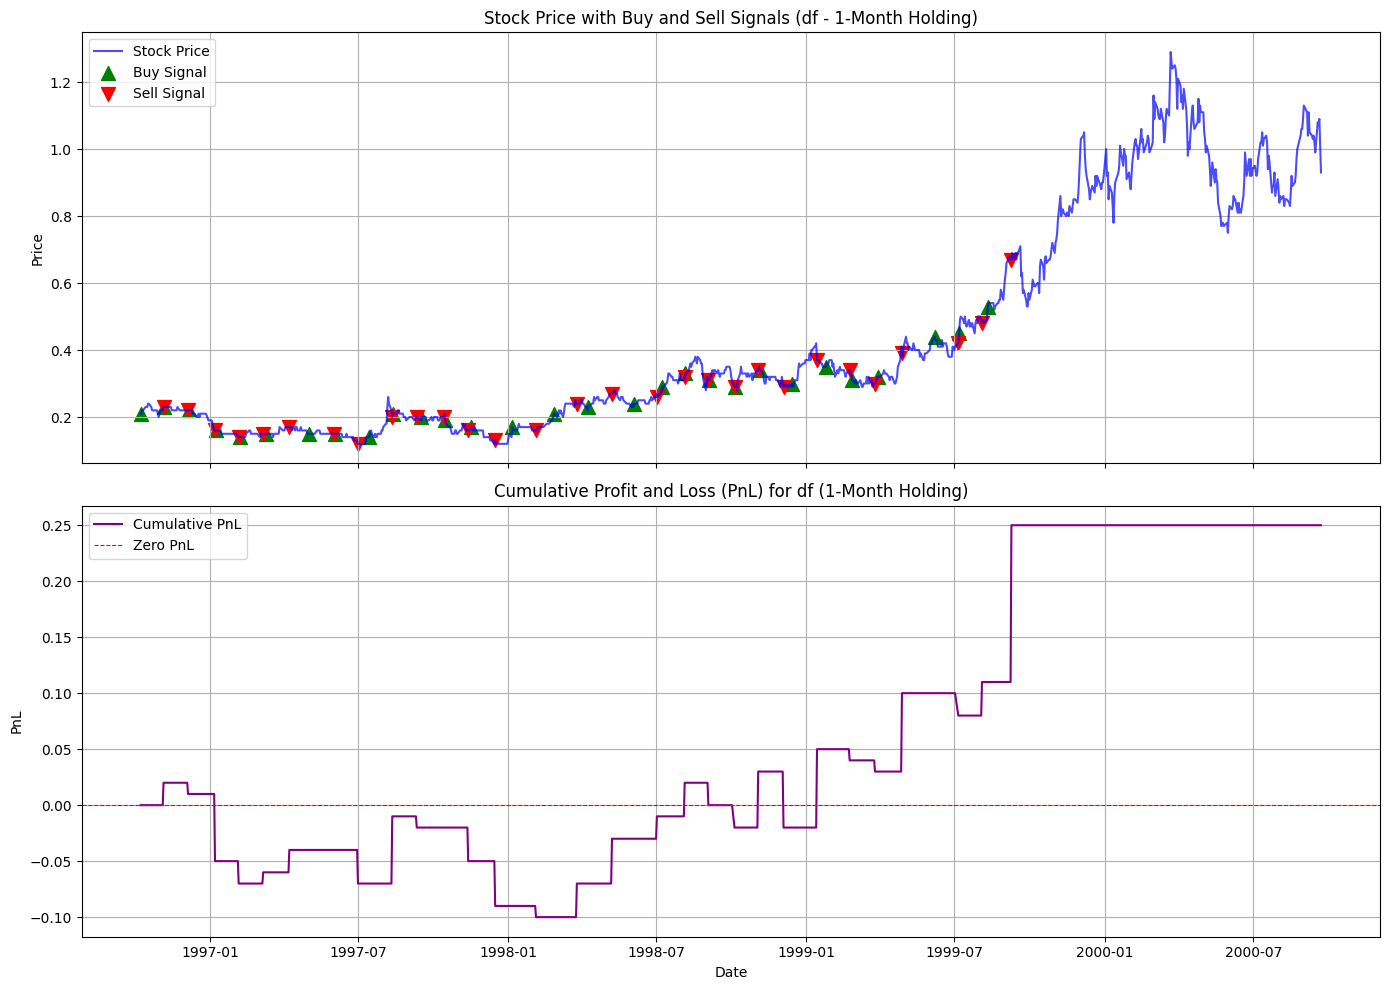

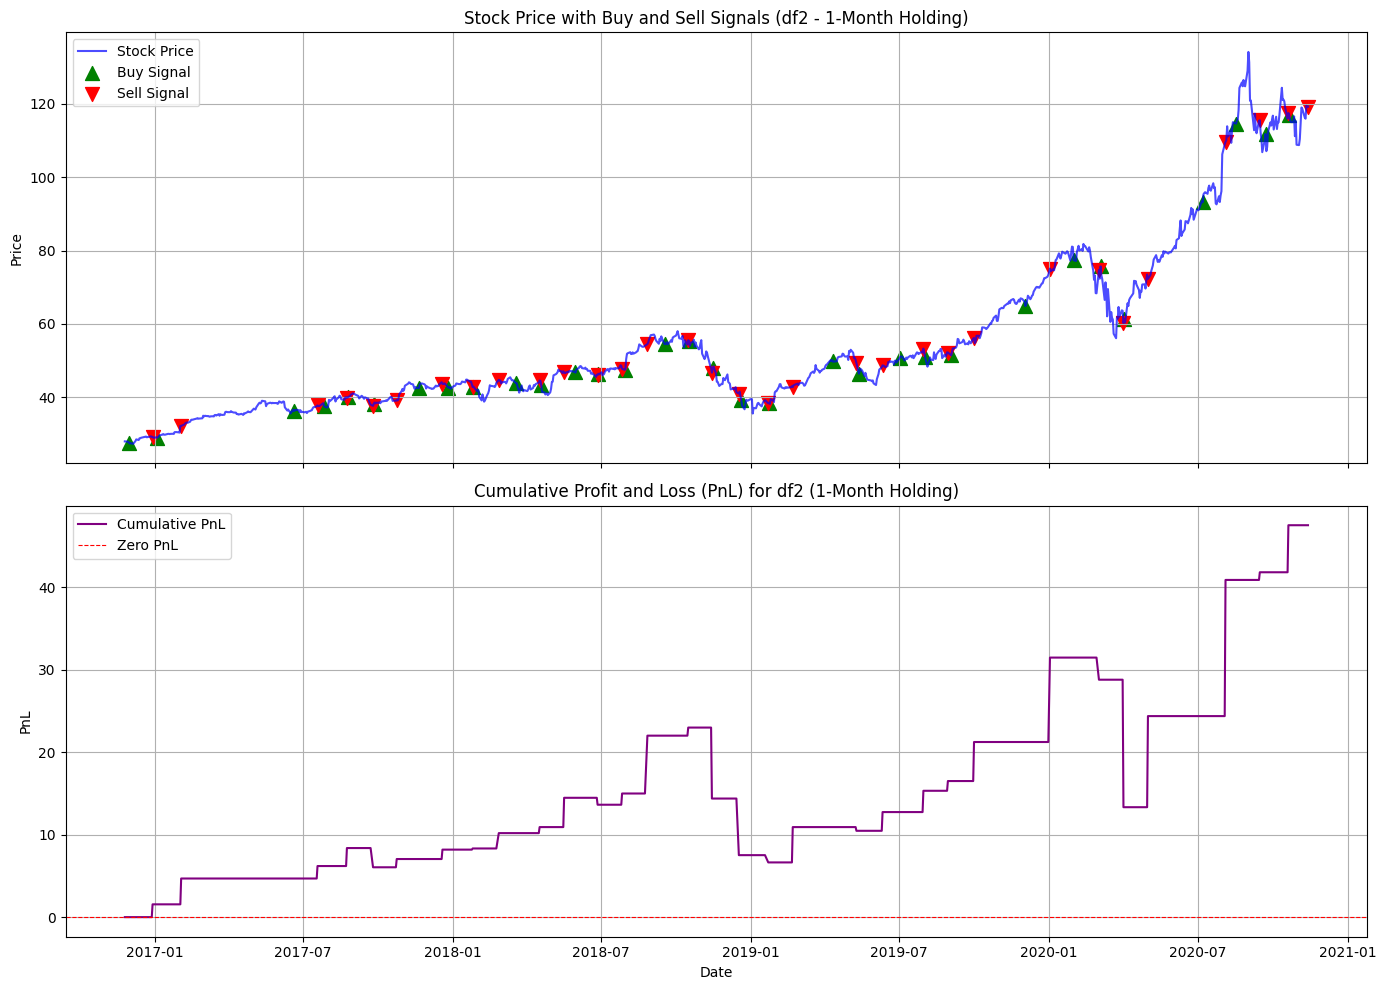

In [ ]:
import matplotlib.pyplot as plt

# --- Plotting results for df (first dataset) ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Stock Price with Buy and Sell Signals for df
ax1.plot(backtest_df_one_month.index, backtest_df_one_month['Price'], label='Stock Price', color='blue', alpha=0.7)

# Mark buy signals for df
buy_signals_df = trade_signals_df_one_month[trade_signals_df_one_month['Signal'] == 'Buy']
ax1.scatter(buy_signals_df['Date'], buy_signals_df['Price'], marker='^', color='green', s=100, label='Buy Signal')

# Mark sell signals for df
sell_signals_df = trade_signals_df_one_month[trade_signals_df_one_month['Signal'] == 'Sell']
ax1.scatter(sell_signals_df['Date'], sell_signals_df['Price'], marker='v', color='red', s=100, label='Sell Signal')

ax1.set_title('Stock Price with Buy and Sell Signals (df - 1-Month Holding)')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

# Plot 2: Cumulative PnL for df
ax2.plot(backtest_df_one_month.index, backtest_df_one_month['Cumulative_PnL_One_Month'], label='Cumulative PnL', color='purple')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=0.8, label='Zero PnL')

ax2.set_title('Cumulative Profit and Loss (PnL) for df (1-Month Holding)')
ax2.set_xlabel('Date')
ax2.set_ylabel('PnL')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# --- Plotting results for df2 (second dataset) ---
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 3: Stock Price with Buy and Sell Signals for df2
ax3.plot(backtest_df_df2_one_month.index, backtest_df_df2_one_month['Price'], label='Stock Price', color='blue', alpha=0.7)

# Mark buy signals for df2
buy_signals_df2 = trade_signals_df2_one_month[trade_signals_df2_one_month['Signal'] == 'Buy']
ax3.scatter(buy_signals_df2['Date'], buy_signals_df2['Price'], marker='^', color='green', s=100, label='Buy Signal')

# Mark sell signals for df2
sell_signals_df2 = trade_signals_df2_one_month[trade_signals_df2_one_month['Signal'] == 'Sell']
ax3.scatter(sell_signals_df2['Date'], sell_signals_df2['Price'], marker='v', color='red', s=100, label='Sell Signal')

ax3.set_title('Stock Price with Buy and Sell Signals (df2 - 1-Month Holding)')
ax3.set_ylabel('Price')
ax3.legend()
ax3.grid(True)

# Plot 4: Cumulative PnL for df2
ax4.plot(backtest_df_df2_one_month.index, backtest_df_df2_one_month['Cumulative_PnL_One_Month'], label='Cumulative PnL', color='purple')
ax4.axhline(y=0, color='red', linestyle='--', linewidth=0.8, label='Zero PnL')

ax4.set_title('Cumulative Profit and Loss (PnL) for df2 (1-Month Holding)')
ax4.set_xlabel('Date')
ax4.set_ylabel('PnL')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The 'Target' variable for both `df` and `df2` was successfully redefined to represent a one-month (20 trading days) holding period. A target of 1 indicates the price after 20 trading days is higher than the current price, and 0 otherwise. Rows with NaN values resulting from this operation were removed.
*   Two XGBoost classifiers, `model_new` (for `df`) and `model_df2` (for `df2`), were retrained using the newly defined 'Target' variable. Features used for training included 'RSI', 'ATR', 'EMA_20', and 'EMA_dist'.
    *   For `df`, the training set had 3998 samples for features and targets, and the test set had 1000 samples.
    *   For `df2`, the training set had 3997 samples for features and targets, and the test set had 1000 samples.
*   An enhanced backtesting strategy was implemented for both `df` and `df2` to simulate a fixed one-month (20 trading days) holding period.
    *   Predictions were generated for both test sets, resulting in `y_pred_df` and `y_pred_df2` arrays, each with a shape of (1000,).
    *   The backtesting logic correctly simulated buy and sell signals based on model predictions, held positions for 20 trading days, calculated Profit and Loss (PnL) for closed trades, and maintained a cumulative PnL.
    *   New DataFrames (`backtest_df_one_month`, `backtest_df_df2_one_month`, `trade_signals_df_one_month`, and `trade_signals_df2_one_month`) were created to store the predictions, cumulative PnL, and trade signals for each dataset.

### Insights or Next Steps

*   The redefinition of the target variable and subsequent retraining of models, coupled with the enhanced backtesting logic, provides a robust framework to evaluate the performance of a one-month holding trading strategy.
*   The next logical step is to visualize these backtesting results, including stock price, buy/sell signals, and the cumulative PnL, to gain a clear understanding of the strategy's performance and identify potential areas for improvement.
